In [1]:
from pylab import *
import numpy as np
import warnings
from sympy import *
import sympy as sp
warnings.filterwarnings('ignore')
import scipy.fftpack as fft
import scipy.integrate as si
import matplotlib.pyplot as plt
from scipy.linalg import norm
from IPython.display import display, Math
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.size'] = 30
plt.rcParams['legend.fontsize'] = 30
from scipy.special import roots_legendre as rl

# $$ \text{ASSIGNMENT 1} $$

### $$\text{Integration using Trapezoidal method and Simpson's }\Big(\frac{1}{3}\Big)^{rd} \text{ method } :$$
$\textbf{Trapezoid rule} \text{ approximates the integral }\displaystyle \int_a^b f(x)\text{ d}x \text{ by the sum :} $ $$\displaystyle \frac{dx}{2} \sum_{k=1}^N (f(x_k) + f(x_{k-1})) \text{ where } \displaystyle x_k = a + k*\text{d}x \text{ and d}x = \frac{(b - a)}{N}.$$       
$$ \\ $$
$\textbf{Simpson's rule} \text{ approximates the integral }\displaystyle\int_a^b f(x)\text{ d}x \text{ by the sum :}$ $$ \displaystyle \frac{dx}{3} \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i})) \text{ where }\displaystyle x_i = a + i*\text{d}x\text{ and d}x = \frac{(b - a)}{N}.$$ 

    Parameters                                                           
    ----------                                       
    f : function                                    
        Vectorized function of a single variable         
    a , b : numbers                                       
        Interval of integration [a,b]                   
    N : integer
        Number of subintervals of [a,b]              
        
    Returns     
    -------
     float     
         Approximation of the integral of f(x) from a to b using the Trapezoid rule 
         and the Simpson's rule with N subintervals of equal length.

In [2]:
def trapz(f,a,b,N=50):
    x = np.linspace(a,b,N+1) 
    y = f(x)
    y_right = y[1:] 
    y_left = y[:-1] 
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

def simps(f,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Q1.WAP to calculate the numerical integration of a given function within given limits using **Trapezoidal method**.
$$\text{and}$$ 
Q2.WAP to calculate the numerical integration of a given function within given limits using **Simpson’s $(\frac{1}{3})^{ rd}$ rule**.         

$\qquad$Verify the program with three functions for which you know the integration results.

#### $\textbf{Example 1}: \displaystyle \int_{1}^{2} (x+1) dx $

trapezoidal method   	: 2.5
simpson's 1/3 method 	: 2.5


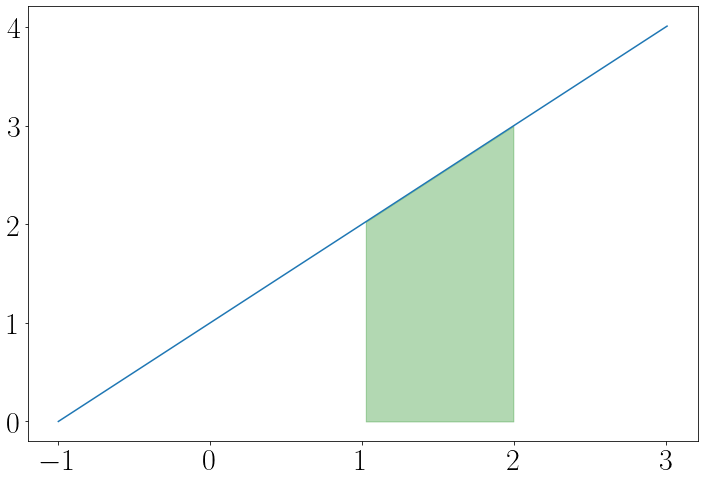

In [3]:
f=lambda x : x+1
x=np.linspace(-1.0,3.01,100)
plt.plot(x,f(x))
plt.fill_between(x,f(x),where = [(x>1) and (x<2) for x in x], color='g', alpha=0.3)

print('trapezoidal method   \t:',trapz(lambda x : x+1,1,2,1))
print("simpson's 1/3 method \t:",simps(lambda x : x+1,1,2,2))

#### $\textbf{Example 2}: \displaystyle \int_{1}^{2} \frac{1}{x} dx $

trapezoidal method 	: 0.6931721793101951
simpson's 1/3 method 	: 0.6931471855549542
verify actual value 	: 0.6931471805599453


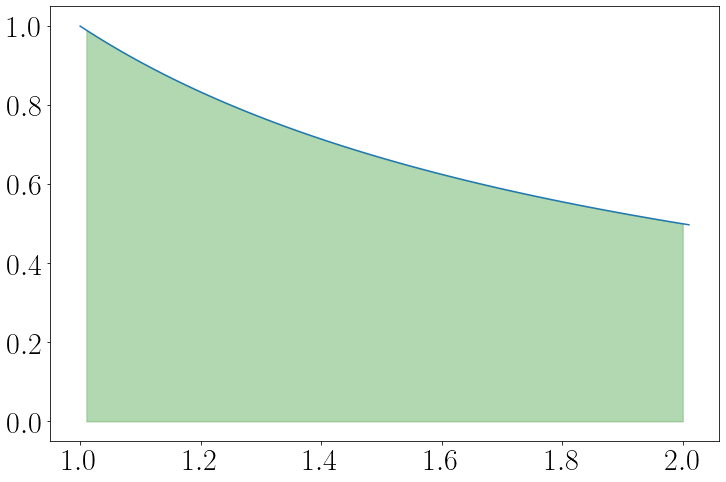

In [4]:
f=lambda x : 1/x
x=np.linspace(1.0,2.01,100)
plt.plot(x,f(x))
plt.fill_between(x,f(x),where = [(x>1) and (x<2) for x in x], color='g', alpha=0.3)

print('trapezoidal method \t:',trapz(f,1,2,50))
print("simpson's 1/3 method \t:",simps(f,1,2,50))
print('verify actual value \t:',np.log(2))

#### $\textbf{Example 3}:\displaystyle \int_{0}^{\pi} \sin{x}{dx} $

trapezoidal method 	: 1.9835235375094549
simpson's 1/3 method 	: 2.0001095173150043


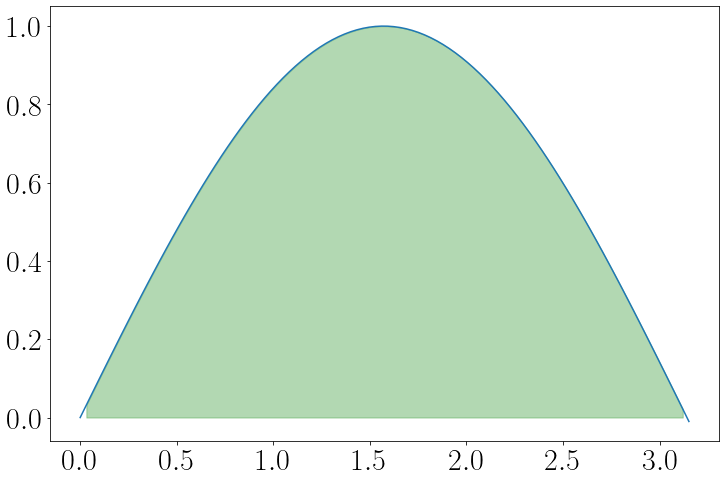

In [5]:
f=lambda x : np.sin(x)
x=np.linspace(0.0,np.pi+0.01,100)
plt.plot(x,f(x))
plt.fill_between(x,f(x),where = [(x>0) and (x<np.pi) for x in x], color='g', alpha=0.3)

print("trapezoidal method \t:",trapz(f,0,np.pi,10))
print("simpson's 1/3 method \t:",simps(f,0,np.pi,10))

#### $\textbf{Example 4}: \displaystyle \int_{1}^{2} x^{x} dx $

trapezoidal method 	: 2.0552531778355307
simpson's 1/3 method 	: 2.050460349542567


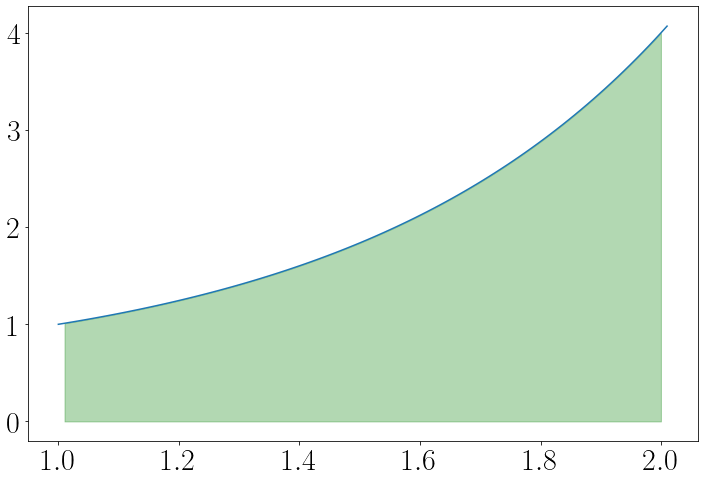

In [6]:
f=lambda x : x**x
x=np.linspace(1.0,2.01,100)
plt.plot(x,f(x))
plt.fill_between(x,f(x),where = [(x>1) and (x<2) for x in x], color='g', alpha=0.3)

print('trapezoidal method \t:',trapz(f,1,2,10))
print("simpson's 1/3 method \t:",simps(f,1,2,10))

#### $\textbf{Example 5}: \displaystyle \int_{0}^{1} \ln{(1+x^2)} dx $

trapezoidal method 	: 0.2647769793779128
simpson's 1/3 method 	: 0.2639429558281774


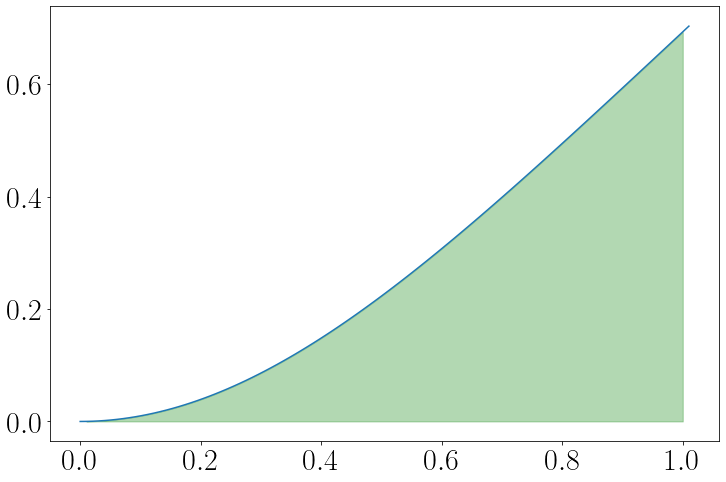

In [7]:
f=lambda x : np.log(1+x*x)
x=np.linspace(-0,1.01,100)
plt.plot(x,f(x))
plt.fill_between(x,f(x),where = [(x>0) and (x<1) for x in x], color='g', alpha=0.3)

print('trapezoidal method \t:',trapz(f,0,1,10))
print("simpson's 1/3 method \t:",simps(f,0,1,10))

#### $\textbf{Example 6}: \displaystyle \int_{0}^{5} \frac{1}{1+x^2} dx $

trapezoidal method 	: 1.3731040812301096
simpson's 1/3 method 	: 1.371454008759302


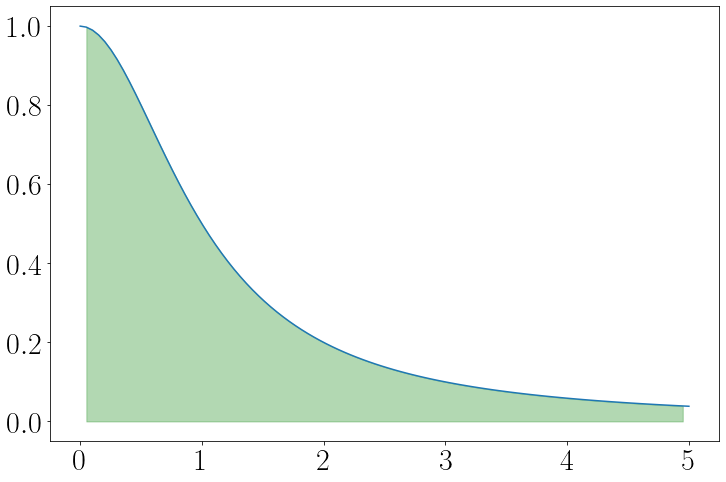

In [8]:
f=lambda x : 1/(1+x*x)
x=np.linspace(0,5,100)
X=np.linspace(0,5,11)
plt.plot(x,f(x))
plt.fill_between(x,f(x),where = [(x>0) and (x<5) for x in x], color='g', alpha=0.3)

print('trapezoidal method \t:',trapz(f,0,5,10))
print("simpson's 1/3 method \t:",simps(f,0,5,10))

Q3. Use both the programs to plot the function :
$$ \displaystyle G(M)=\int_{0}^M e^{-x^2} dx$$
As a function of **M**. (Try to go upto a very large value of M.) Use step size = 0.0001 in both the cases.

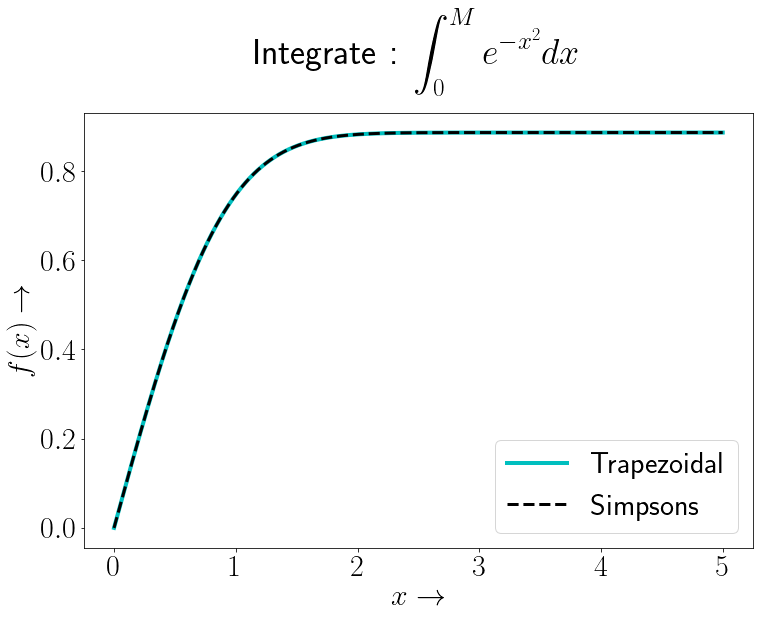

In [9]:
a = 10000               # for step size = 0.0001
n = 5 * a
A = [i/a for i in range(n+1)]
t = ([trapz(lambda x : np.exp(-x**2),0,M,100)for M in A])
s = ([simps(lambda x : np.exp(-x**2),0,M,100)for M in A])

plt.plot(A,t,'c-', linewidth=4)
plt.plot(A,s,'k--', linewidth=3)
plt.xlabel(r'$x \rightarrow$')
plt.ylabel(r'$f(x) \rightarrow$')
plt.title(r'Integrate : $\displaystyle\int_{0}^M e^{-x^2} dx$', y=1.1)
plt.legend(['Trapezoidal','Simpsons'],loc='lower right')
plt.show()  

Q4. Evaluate the Integral $ \displaystyle \int_{-1}^1 (x^8-3x^6+2x^4) \text{ d}x $ as a function of step size  using both the progams.

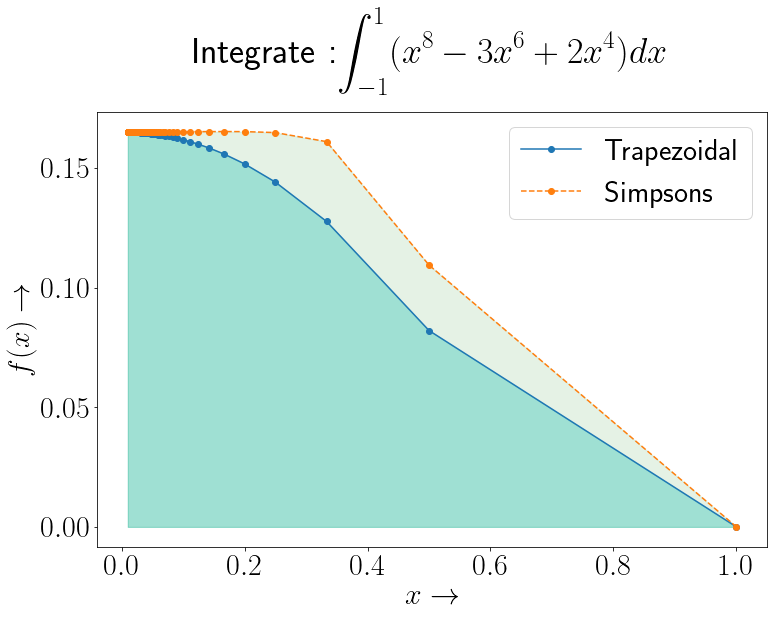

In [10]:
a = -1
b = 1
A = [2*i for i in range(1,101)]
h = [(b-a)/j for j in A]               # setting step size
t = [trapz(lambda x : ((x**8)-(3*x**6)+(2*x**4)),a,b,M) for M in A]
s = [simps(lambda x : ((x**8)-(3*x**6)+(2*x**4)),a,b,M) for M in A] 

plt.plot(h,t,'o-')
plt.plot(h,s,'o--')

plt.fill_between(h,t, color='c', alpha=0.3)
plt.fill_between(h,s, color='g', alpha=0.1)

plt.xlabel(r'$x \rightarrow$')
plt.ylabel(r'$f(x) \rightarrow$')
plt.title(r'Integrate :$\displaystyle\int_{-1}^1 (x^8-3x^6+2x^4)dx$',y=1.1)
plt.legend(['Trapezoidal','Simpsons'])
plt.show()

# $$ \text{ASSIGNMENT 2} $$
## $$\text{Integration using Gaussian method }$$ $$\\\text{and comparing using scipy.integrate.fixed_quad()}$$

In [11]:
def gauss(f,a,b,N=50):
    V = rl(N)
    t = V[0]
    w = V[1]
    x = ((b-a)/2)*t + (b+a)/2
    k = ((b-a)/2)*f(x)
    G = sum(w*k)
    return G

### $\text{Example 1}: \displaystyle \int_{1}^{2} {x^9} \text{ d}x \text{ for n=5}$

In [12]:
print('trapezoidal method \t:',trapz(lambda x : x**9,1,2,5))
print("simpson's 1/3 method \t:",simps(lambda x : x**9,1,2,5+1))
print('Gauss method \t\t:',gauss(lambda x : x**9,1,2,5))
print("fixed quad \t\t:",si.fixed_quad(lambda x : x**9,1,2,n=5)[0])

trapezoidal method 	: 109.87991884800002
simpson's 1/3 method 	: 102.43291859567898
Gauss method 		: 102.29999999999995
fixed quad 		: 102.29999999999995


### $\text{Example 2}: \displaystyle \int_{1}^{2} {x^{13}} \text{ d}x \text{ for n=7}$

In [13]:
print('trapezoidal method \t:',trapz(lambda x : x**13,1,2,7))
print("simpson's 1/3 method \t:",simps(lambda x : x**13,1,2,7+1))
print('Gauss method \t\t:',gauss(lambda x : x**13,1,2,7))
print("fixed quad \t\t:",si.fixed_quad(lambda x : x**13,1,2,n=7)[0])

trapezoidal method 	: 1259.745518979078
simpson's 1/3 method 	: 1172.49816201262
Gauss method 		: 1170.2142857142867
fixed quad 		: 1170.2142857142867


### $\text{Example 3}: \displaystyle \int_{1}^{2} {x^{17}} \text{ d}x \text{ for n=9}$

In [14]:
print('trapezoidal method \t:',trapz(lambda x : x**17,1,2,9))
print("simpson's 1/3 method \t:",simps(lambda x : x**17,1,2,9+1))
print('Gauss method \t\t:',gauss(lambda x : x**17,1,2,9))
print("fixed quad \t\t:",si.fixed_quad(lambda x : x**17,1,2,n=9)[0])

trapezoidal method 	: 15695.725746519294
simpson's 1/3 method 	: 14598.691759109028
Gauss method 		: 14563.499999999993
fixed quad 		: 14563.499999999993


### $\text{Example 4}: \displaystyle \int_{0}^{\pi} x \sin x \text{ d}x \text{ for fixed value of n and verify the value.}$

In [15]:
n=1
I_old=0
diff=2
while abs(diff)>1e-10:
    I_new=gauss(lambda x : x*np.sin(x),0,np.pi,n)
    diff  = I_new-I_old
    I_old = I_new 
    n = n+1
    
print('I_new\t\t\t n-1', '\t' ,' abs(diff)')    
print(I_new,'\t', n-1,'\t', abs(diff))
print('\nfixed quad :',si.quad(lambda x : x*np.sin(x),0,np.pi)[0])

I_new			 n-1 	  abs(diff)
3.141592653589788 	 8 	 2.816857858078947e-12

fixed quad : 3.141592653589793


# $$ \text{ASSIGNMENT 3} $$

 Q1. Show that for the normal probability distribution is described by the Gaussian function
 $$\Large \displaystyle{\lim_{\sigma \to 0} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2 {\sigma}^2}} = \delta(x-\mu)} $$ where $\mu$ is the mean and $\sigma$ the standard deviation:  $$\int \cos x\delta(x-\mu) dx = -1$$
 where $\mu = \pi$

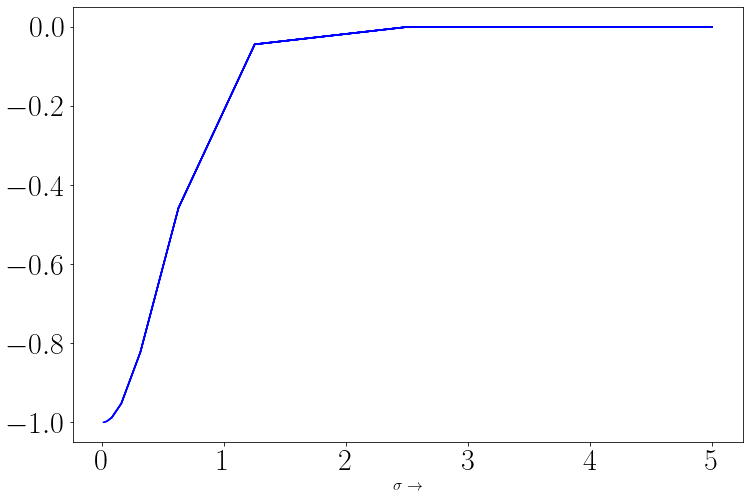

In [16]:
sigma=10
E,s=[],[]

def f(x):
    return np.cos(x)*(1/(sigma*(2*np.pi)**0.5))*np.exp(-(x-np.pi)**2/(2*(sigma)**2))

for i in range(10):
    a=si.quad(lambda x:f(x),np.pi-5*(sigma),np.pi+5*(sigma),limit=200)[0]
    sigma=sigma*0.5
    E.append(a)
    s.append(sigma)
    plt.plot(s,E,'b-')
    plt.xlabel(r'$ \sigma \rightarrow $',fontsize=16)
plt.show()

 Q2. Show that $\large\displaystyle{\lim_{\epsilon \to 0} \frac{1}{\pi}(\frac{\epsilon}{x^2 + \epsilon^2}) = \delta(x)} $ by applying it on two functions of $x$.

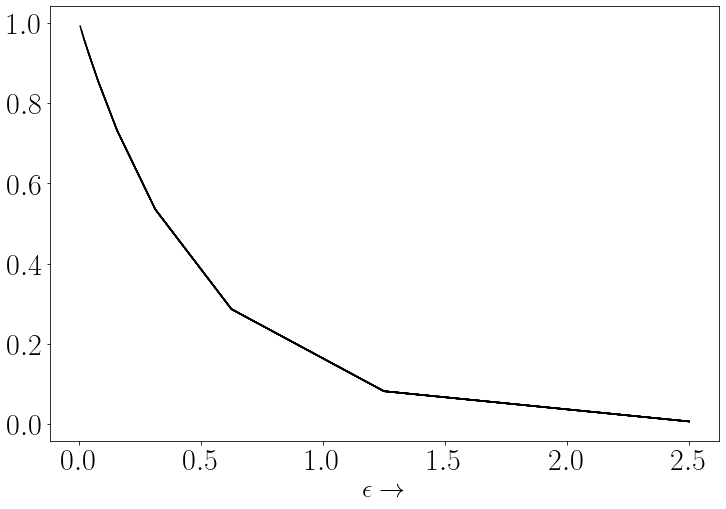

In [17]:
E=5
A,s = [],[]

def f(x):
    return np.cos(x)*(1/np.pi)*(E/(x**2+E**2))

for i in range(10):
    a=si.quad(lambda x:f(x),-150*E,150*E,limit=500)[0]
    E=E*0.5
    A.append(a)
    s.append(E)
    plt.plot(s,A,'k-')
    plt.xlabel(r'$ \epsilon \rightarrow $',fontsize=26)
plt.show()

 Q3. Plot the following function in the domain $(-4\pi \le x \le 4\pi) :$ $ \\ $ $$\large f(x)=\tan^{-1}x \textrm{  for  } 0\le x <2\pi \textrm{  and  } f(x+2\pi)=f(x)$$ $\\ $
     Reconstruct this function with its **Fourier Components**.

In [18]:
f=lambda x: np.arctan(x%(2*np.pi))

x=np.arange(-5*np.pi,5*np.pi,0.0001)

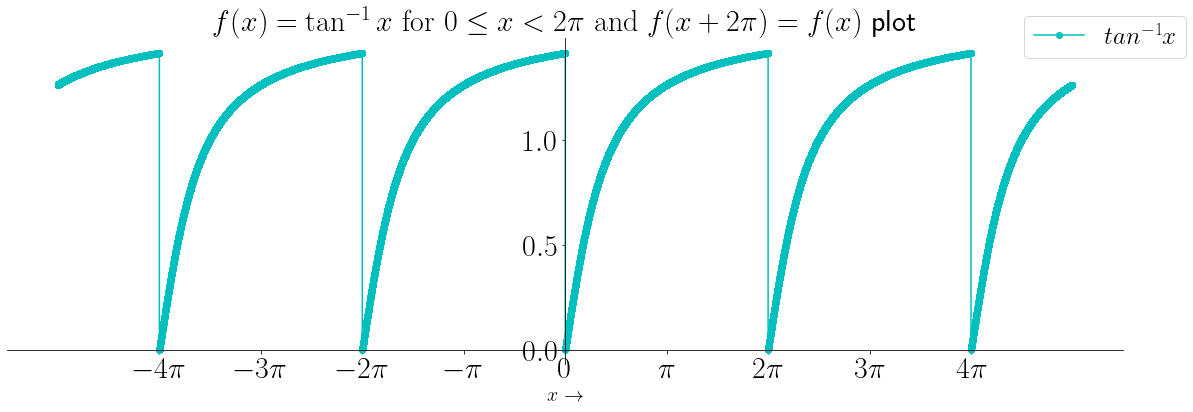

In [19]:
q1=[(-4*np.pi),(-3*np.pi),(-2*np.pi),(-np.pi),0,np.pi,(2*np.pi),(3*np.pi),(4*np.pi)]
q2=[r'${-4\pi}$',r'${-3\pi}$',r'${-2\pi}$',r'${-\pi}$',r'$0$',r'${\pi}$',r'${2\pi}$',r'${3\pi}$',r'${4\pi}$']

fig = plt.figure(figsize=(20,6))
a = fig.add_subplot(111)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.plot(x,f(x),'co-')
ax.legend(['$tan^{-1} x$'],bbox_to_anchor=(0.9, 0.9),fontsize=25)
xlim(1.1*x.min(), 1.1*x.max())
xticks(q1,q2, fontsize=30)
xlabel(r'$ x \rightarrow $', fontsize=20)
plt.title(r'$f(x)=\tan^{-1}x \textrm{  for  } 0\le x <2\pi\textrm{  and  } f(x+2\pi)=f(x)$ plot',fontsize=30)
plt.show()

## For a function of fourier
## $$ \displaystyle{f(x) = \frac{a_o}{2} + \sum_{n=1}^\infty a_n \cos nx + \sum_{n=1}^\infty b_n \sin nx }$$
## where,
## $ \displaystyle{\qquad a_o = \frac{1}{2\pi} \int_{0}^{2\pi} f(x) \text{ d}x }$
## $ \displaystyle{\qquad a_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \cos nx \text{ d}x }$
## $ \displaystyle{\qquad b_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \sin nx \text{ d}x \text{ for n = 1,2,3,4.....}}$

In [20]:
def fft_plot(x,y,maxn):
    def ff(f,x,maxn):
        Ao=(1/(2*np.pi))*si.quad(lambda x:f(x),0,2*np.pi,limit=200)[0]
        A,B=[0],[0]

        for n in range(1,maxn):
            An=1/(np.pi)*si.quad(lambda x:np.cos(n*x)*f(x),0,2*np.pi,limit=200)[0]
            A.append(An)
            Bn=1/(np.pi)*si.quad(lambda x:np.sin(n*x)*f(x),0,2*np.pi,limit=200)[0]
            B.append(Bn)    
    
        for n in range(maxn):
            Ao=Ao+A[n]*np.cos(n*x)+B[n]*np.sin(n*x)
        return Ao
    
    for n in maxn:
        Y = ff(f,x,n)
        fig = plt.figure(figsize=(20,8))
        a = fig.add_subplot(111)
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data',0))
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('data',0))    
        ax.plot(x,y,'ro-',x,Y,'g-.')
        xlim(1.1*x.min(), 1.1*x.max())
        xticks(q1,q2, fontsize=30)
        xlabel(r'$ x \rightarrow $', fontsize=20)
        ax.legend(['analytic $tan^{-1} x$', "approximate"],bbox_to_anchor=(0.9, 0.8),fontsize=30)
        plt.title(r'Fourier components of $\displaystyle\tan^{-1} x $  plot for $%0.f$ itterations'%(n),fontsize=40,y=1.1)
    plt.show()
    return ax

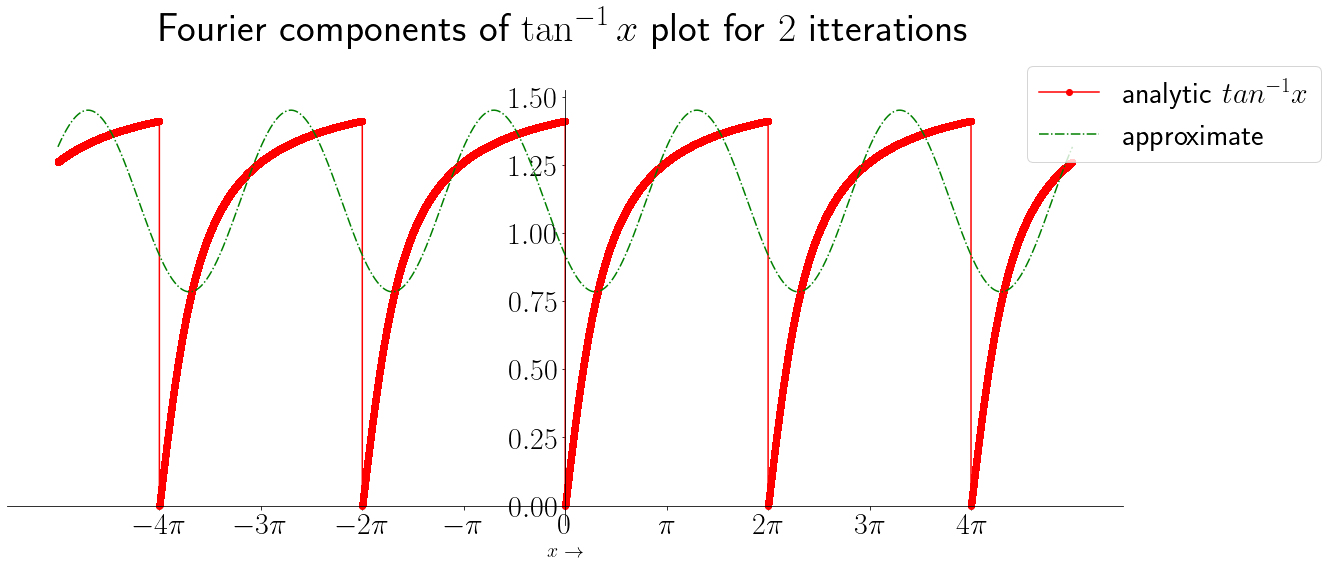

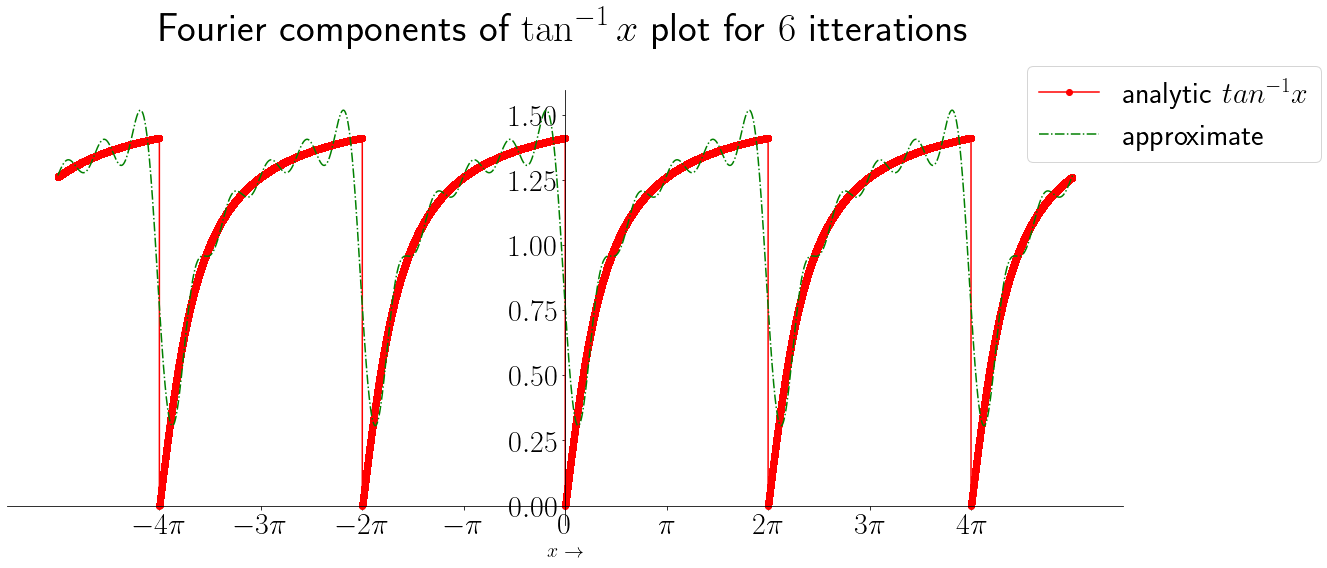

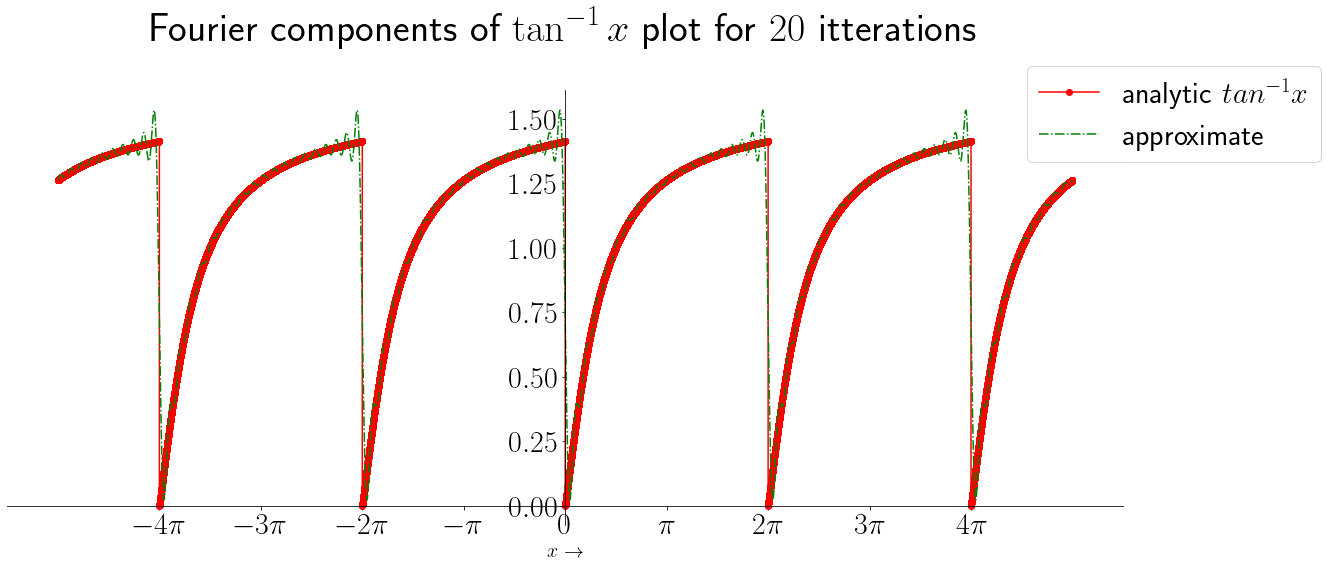

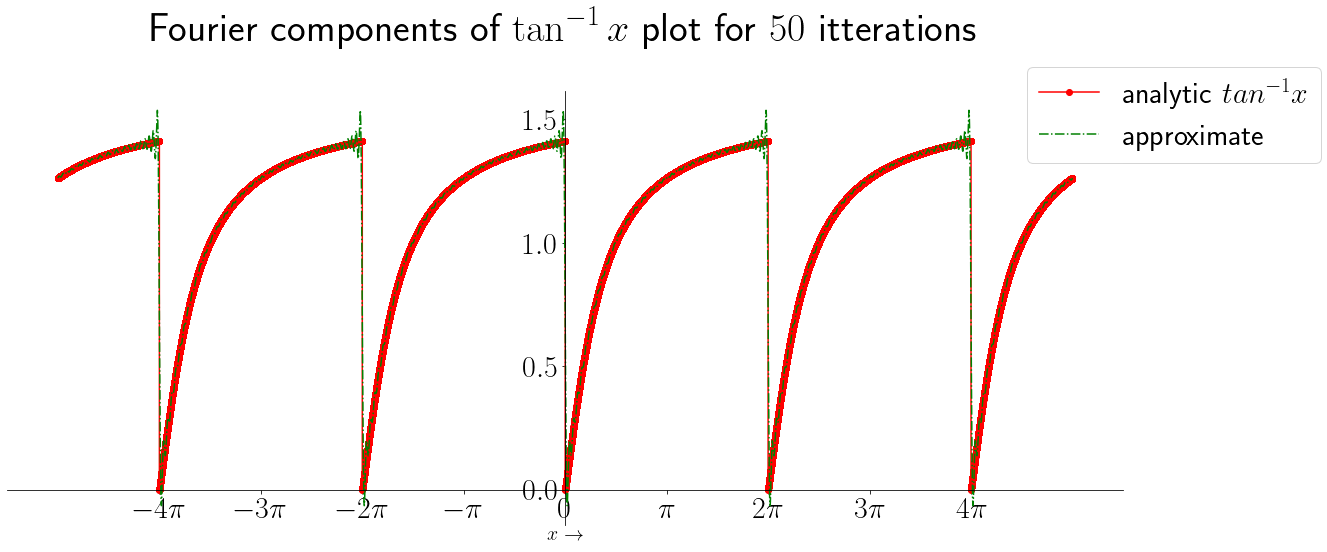

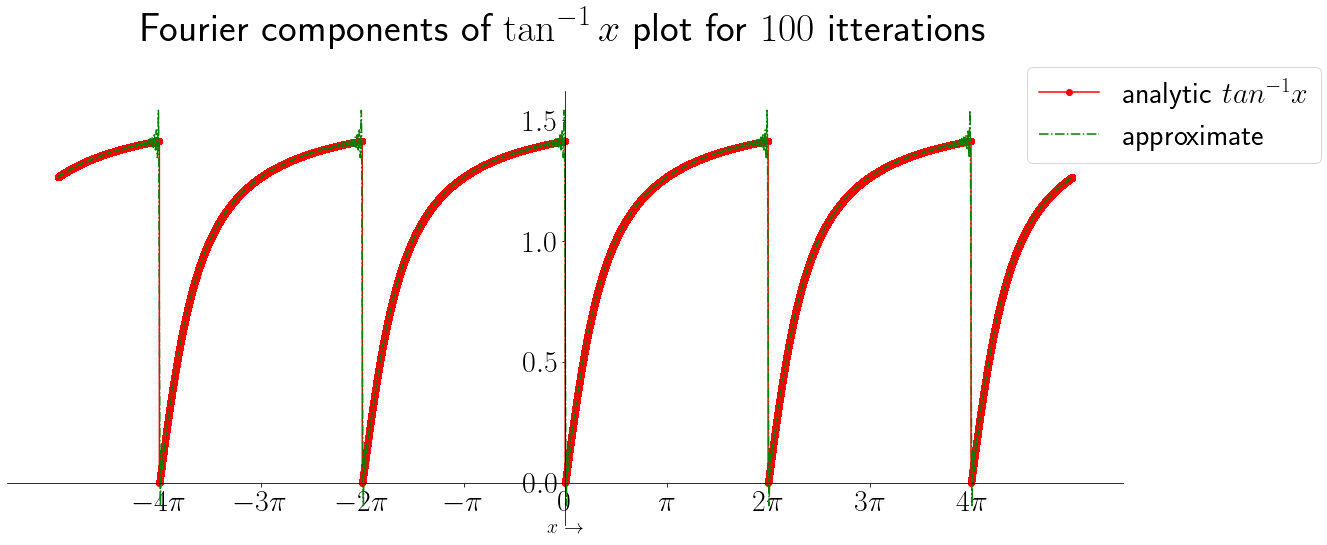

In [21]:
maxn=[2,6,20,50,100]
fft_plot(x,f(x),maxn)
show()

$\text{Comments : We see on increasing the no. of intervals the fourier plot matches the graph plot ,} $                   
$\qquad \qquad \ \ \text{ but we observe that there's a flux gathered at the top-right-end of the plot wihich is the Gaussian flux.}$

Q4. Plot the Fourier integral of the function:
$$ f(x)=x\exp{(-\frac{x^2}{2\sigma^2})}$$
Plot the imaginary part as a function of $k$ for three values of $\sigma$.                                                 
Show that as increases the momentum uncertainty decreases. Also show that the real parts are zero in all cases.

Real part norm for sigma_{0} is : 0.0
Real part norm for sigma_{1} is : 0.0
Real part norm for sigma_{2} is : 0.0


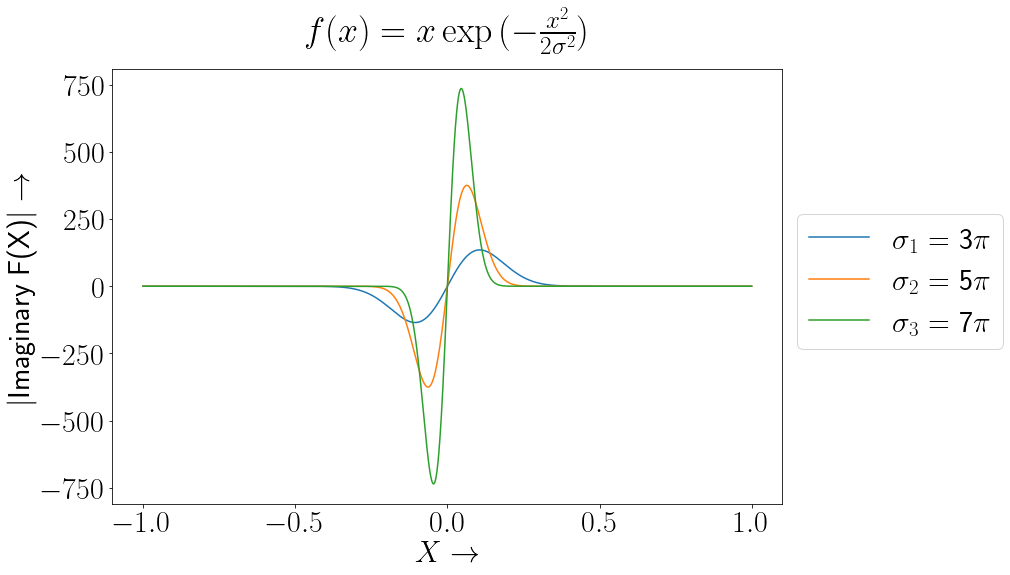

In [22]:
def f(x,k,s):
    return x*np.exp(-(x**2/(2*s**2)))*np.cos(k*x)

def g(x,k,s):
    return x*np.exp(-(x**2/(2*s**2)))*np.sin(k*x)

k=np.arange(-1,1,0.001)
sigma=np.pi*np.array([3, 5, 7])

Real=[[si.quad(f,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma]
Imag=[[si.quad(g,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma] 

for i in range(len(sigma)):
    print(r'Real part norm for sigma_{%i} is :'%(i),norm(Real[i]))
    plt.plot(k,Imag[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$|$Imaginary F(X)$| \rightarrow$")
plt.legend(bbox_to_anchor=(1, 0.7))
plt.title(r'$ f(x)=x\exp{(-\frac{x^2}{2\sigma^2})}$',y=1.05)    
plt.show()

Q5. Calculate the Fourier integral of the following functions and the then plot the power spectrum, $ | \textrm{Fourier Transformation}|^2$ as a function of frequency :

a) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } 0\le x\le a,\\ 0 & \textrm{ elsewhere } \end{array} \right.$
             (Repeat the problem for a= 1, 3, 5). Put comments about your observations on the effect of increasing $a$.
             
b) $f(x)=\sin x +\sin 2x$   

c) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } x<0,\\ \sin 2x & \textrm{ for } x \ge 0 \end{array} \right. \qquad$
     (Comment on the differences between the power spectrum of case (b) and (c)

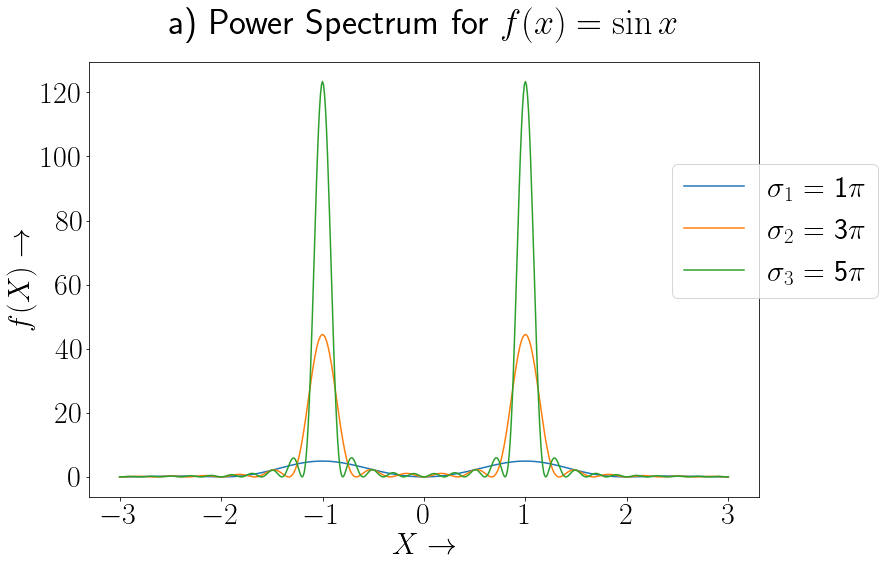

In [23]:
def f1_sin(x,t):
    return np.sin(x)*np.sin(x*t)

def f1_cos(x,t):
    return np.cos(x)*np.cos(x*t)

T=np.linspace(-3,3,601)
sigma=np.pi*np.array([1, 3, 5])

yr1=[[si.quad(f1_cos,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
yi1=[[si.quad(f1_sin,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y1=[[yr1[i][t]**2 + yi1[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]

for i in range(len(sigma)):
    plt.plot(T,y1[i], label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.legend(bbox_to_anchor=(1.2, 0.8))
plt.title(r' a)  Power Spectrum for $f(x)=\sin x$',y=1.05) 
plt.show()

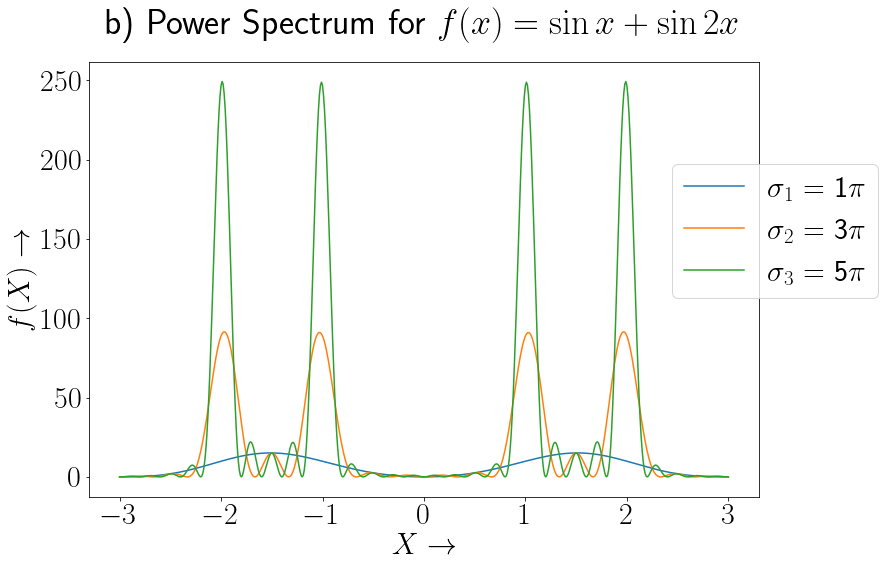

In [24]:
def f2_sin(x,t):
    return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

def f2_cos(x,t):
    return (np.sin(x) + np.sin(2*x))*np.cos(x*t)

T=np.linspace(-3,3,601)
sigma=np.pi*np.array([1., 3., 5.])

yr2=[[si.quad(f2_cos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
yi2=[[si.quad(f2_sin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y2=[[yr2[i][t]**2 + yi2[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]

for i in range(len(sigma)):
    plt.plot(T,y2[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.legend(bbox_to_anchor=(1.2, 0.8))
plt.title(r' b)  Power Spectrum for $f(x)=\sin x + \sin 2x$',y=1.05) 
plt.show()

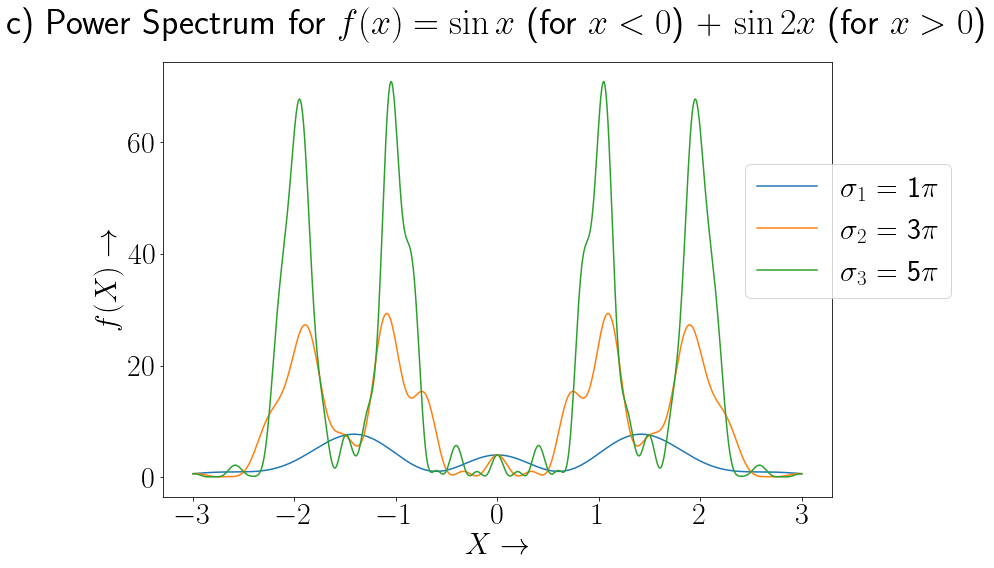

In [25]:
def f3_sin(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

def f3_cos(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)

T=np.linspace(-3,3,601)
sigma=np.pi*np.array([1., 3., 5.])

yr3=[[si.quad(f3_cos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
yi3=[[si.quad(f3_sin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
y3=[[yr3[i][t]**2 + yi3[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]

for i in range(len(sigma)):
    plt.plot(T,y3[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,sigma[i]/np.pi))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.legend(bbox_to_anchor=(1.2, 0.8))
plt.title(r' c)  Power Spectrum for $f(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)',y=1.05)
plt.show()

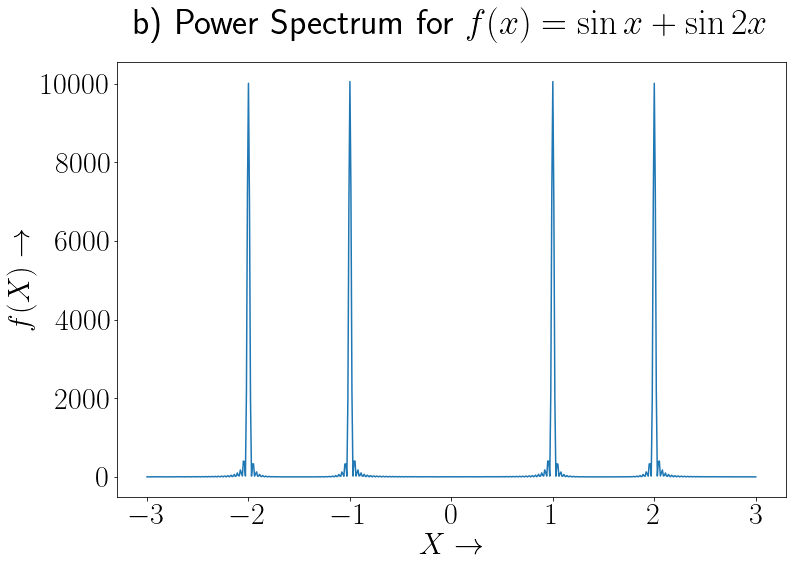

In [26]:
def f2_sin(x,t):
    return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

def f2_cos(x,t):
    return (np.sin(x) + np.sin(2*x))*np.cos(x*t)

N=100
T=np.linspace(-3,3,601)

yr2=[si.quad(f2_cos,-N,N,args=(t),limit=500)[0] for t in T] 
yi2=[si.quad(f2_sin,-N,N,args=(t),limit=500)[0] for t in T] 
y2=[yr2[t]**2 + yi2[t]**2 for t in range(len(T))] 

plt.plot(T,y2)
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.title(r'b) Power Spectrum for $f(x)=\sin x + \sin 2x$',y=1.05) 
plt.show()

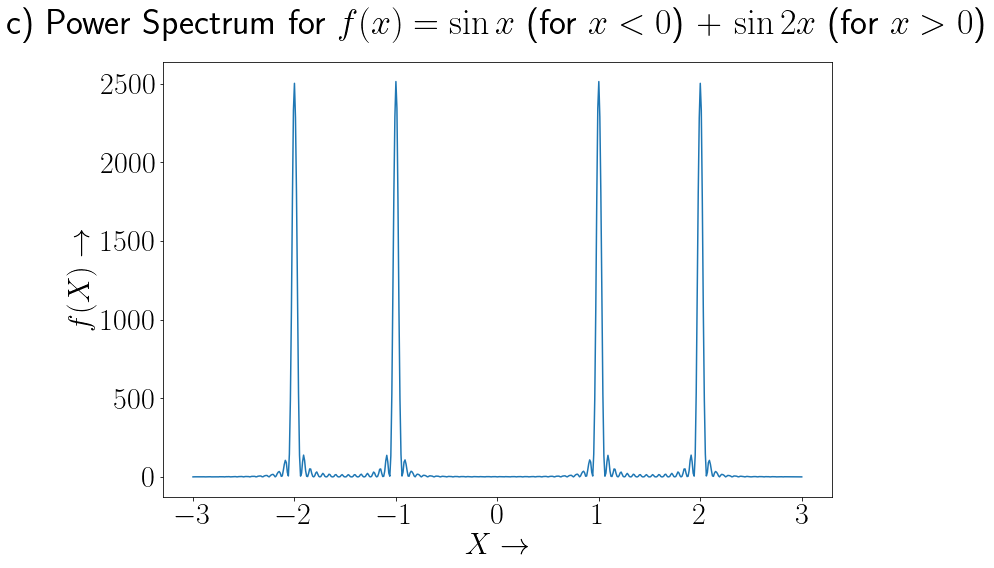

In [27]:
def f3_sin(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

def f3_cos(x,t):
    return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)

N=100
T=np.linspace(-3,3,601)

yr3=[si.quad(f3_cos,-N,N,args=(t),limit=500)[0] for t in T] 
yi3=[si.quad(f3_sin,-N,N,args=(t),limit=500)[0] for t in T] 
y3=[yr3[t]**2 + yi3[t]**2 for t in range(len(T))] 

plt.plot(T,y3)
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$f(X) \rightarrow$")
plt.title(r'c)  Power Spectrum for $f(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)',y=1.05)
plt.show()

Q6. Calculate the FFT of a signal $ F(t)=\sin 50t.$ Change the sampling frequency and sampling time and see the effect on the power spectrum.                                                                                                       
Do you see your observations in conformation with sampling theorem? You should be able to plot the abscissa of your power spectrum.

sampling : 16 |	freq res. : 0.09999999999999999 |	maxn. frequency : 1.5999999999999999


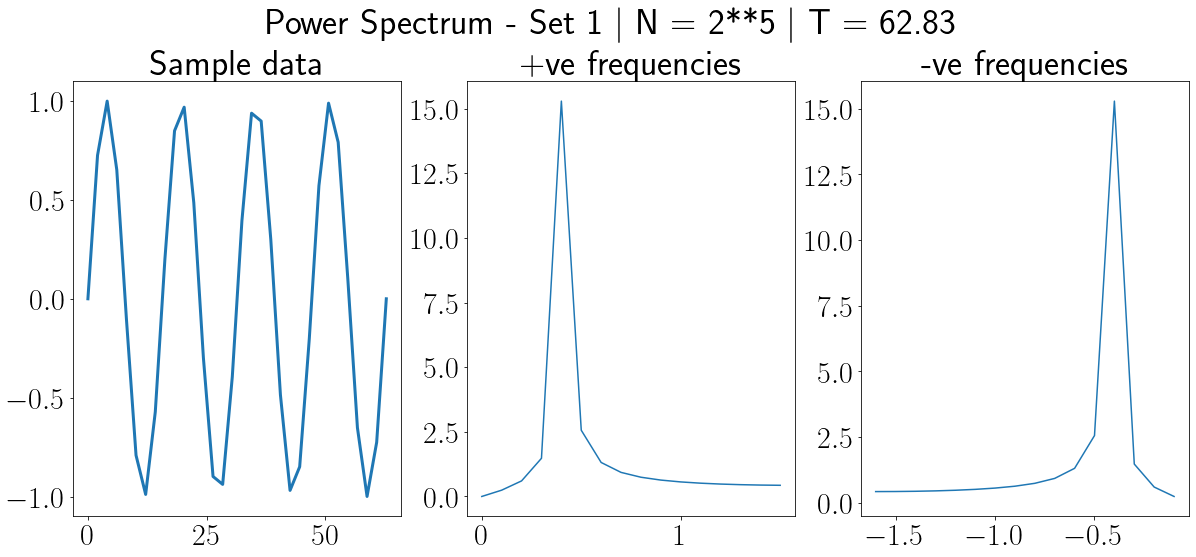

sampling : 128 |	freq res. : 0.06281407035175879 |	maxn. frequency : 8.040201005025125


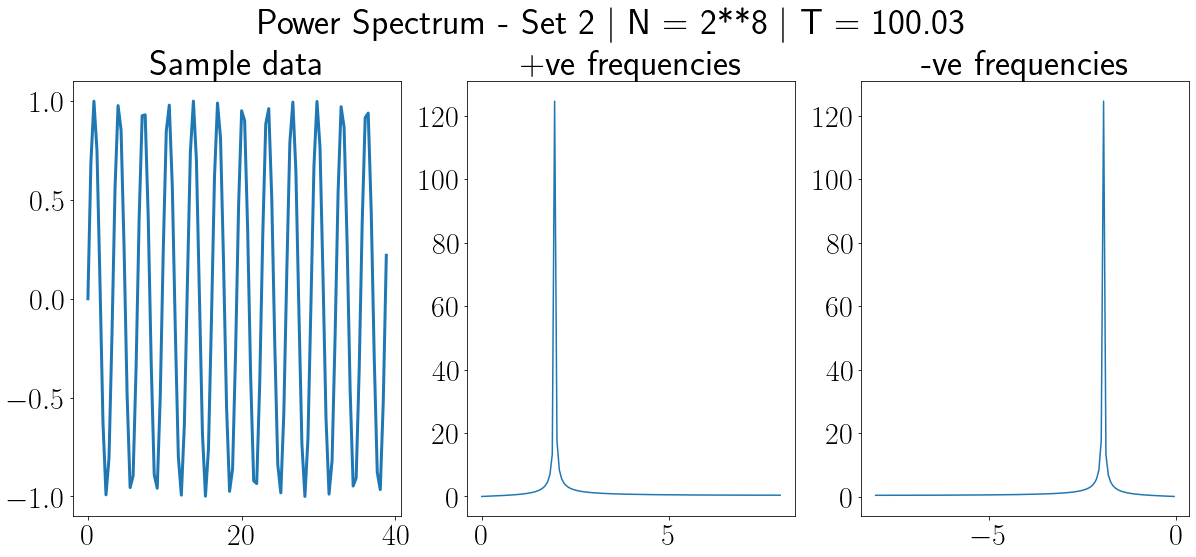

sampling : 2048 |	freq res. : 0.06249999999999999 |	maxn. frequency : 127.99999999999999


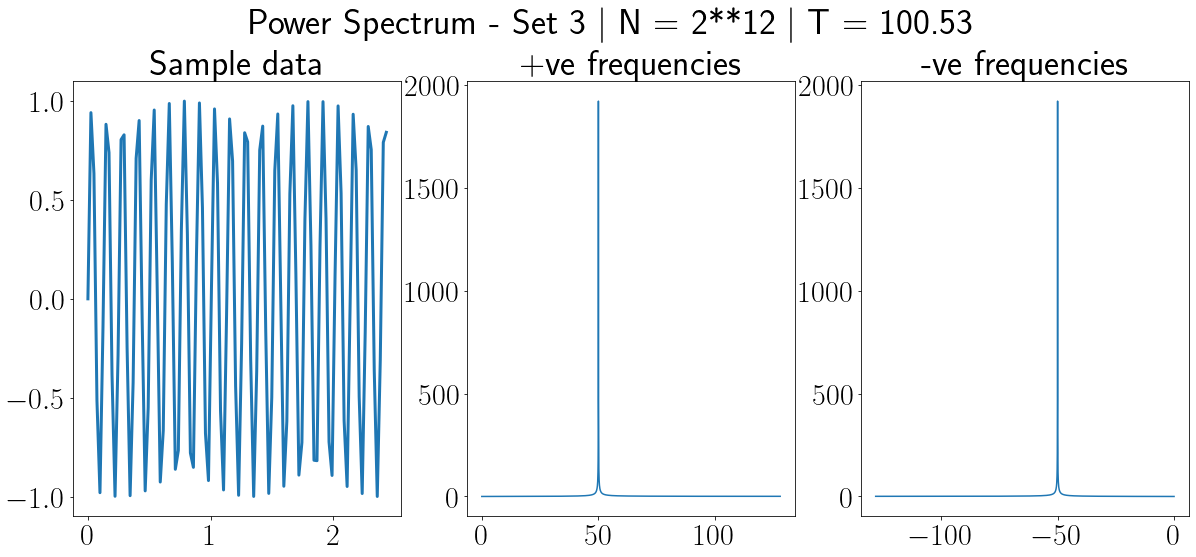

sampling : 64 |	freq res. : 1.9999999999999998 |	maxn. frequency : 127.99999999999999


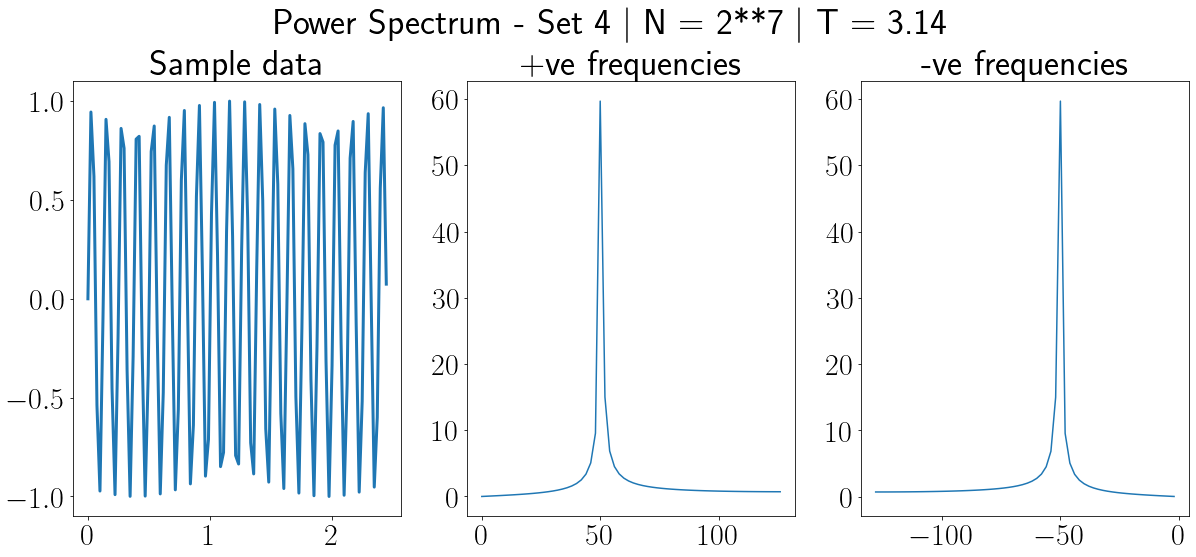

sampling : 128 |	freq res. : 0.22222222222222218 |	maxn. frequency : 28.44444444444444


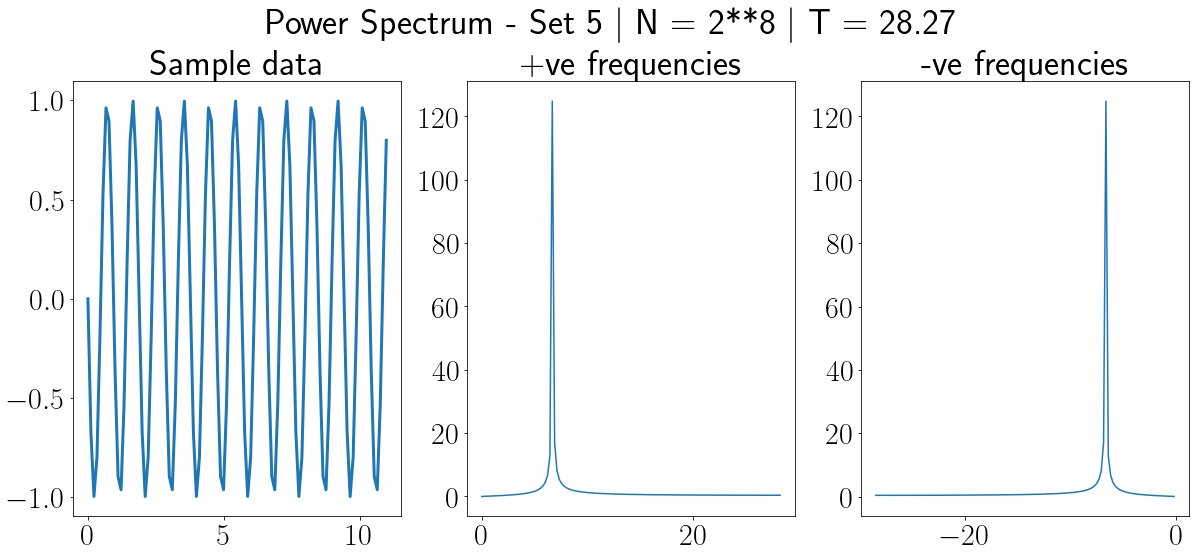

sampling : 512 |	freq res. : 0.049999999999999996 |	maxn. frequency : 25.599999999999998


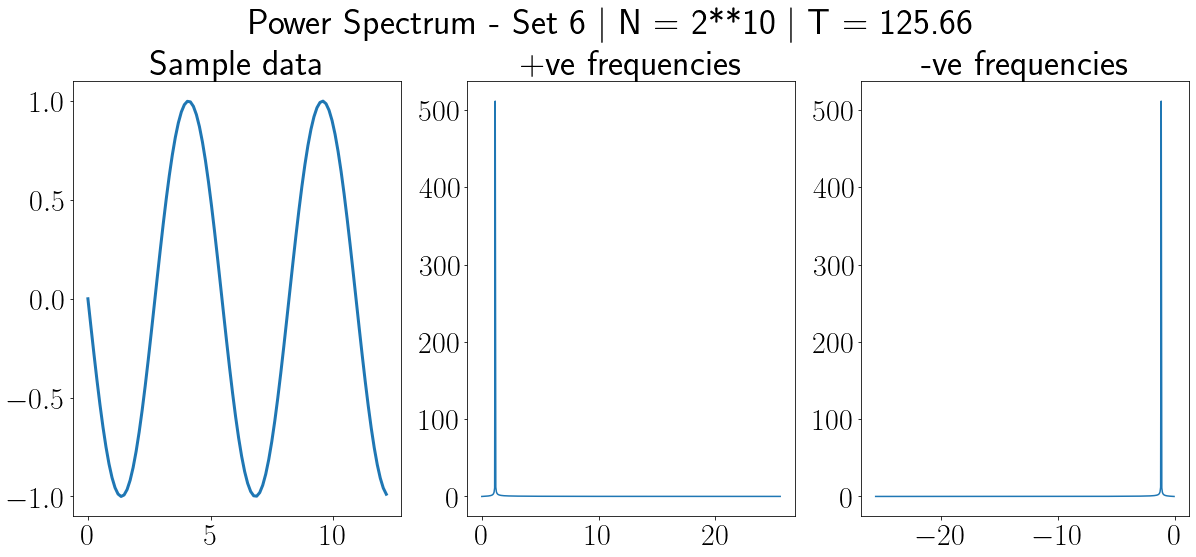

sampling : 2048 |	freq res. : 0.049999999999999996 |	maxn. frequency : 102.39999999999999


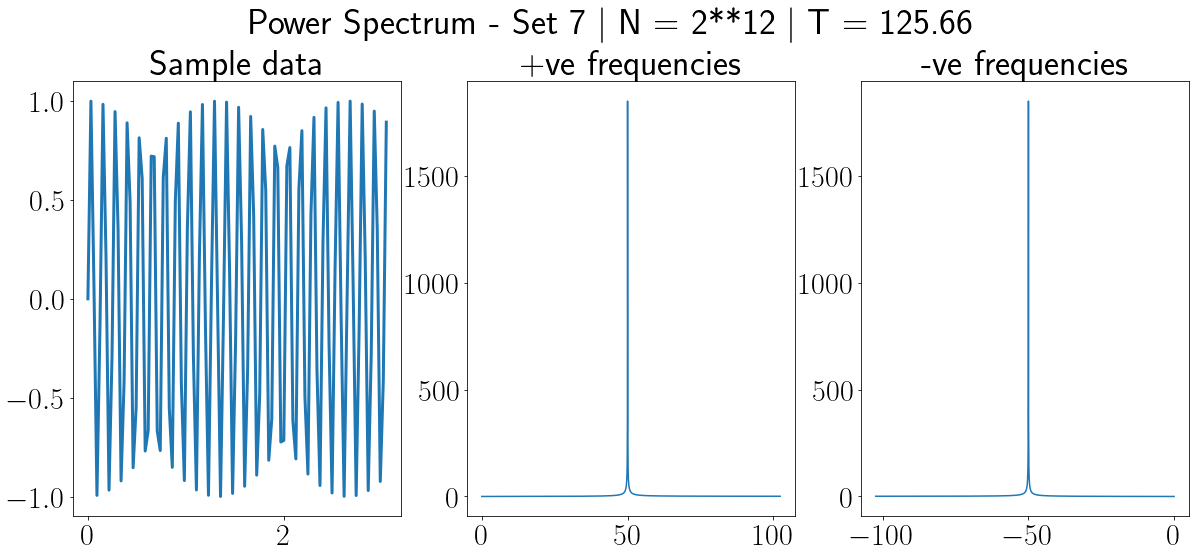

In [28]:
w=50          # signal frequency
Tp=2*np.pi/w  # signal time period
k=[5,8,12,7,8,10,12]          # intevals
t=[500,796,800,800/(2**5),900/(2**2),1000,1000]
i=[1,2,3,4,5,6,7]
plt.rcParams["figure.figsize"] = (20,8)

for t,k,i in zip(t,k,i):
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency for sampling
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X)
    Yp=np.abs(fft.fft(Y))
    Wp=np.arange(0,wmax,wo)  # taking the positive side
    Wn=np.arange(-wmax,0,wo) # taking the negative side
    fig,(ax,ax1,ax2)=plt.subplots(1,3)
    plt.suptitle(r'Power Spectrum - Set %i $|$ N = 2**%i $|$ T = %0.2f'%(i,k,T),y=1.01)
    ax.plot(X[:100],Y[:100],linewidth=3)
    ax.set_title('Sample data')
    ax1.plot(Wp,Yp[:Nh])
    ax1.set_title('+ve frequencies')
    ax2.plot(Wn,Yp[Nh:])
    ax2.set_title('-ve frequencies')
    plt.show()

Q7. Calculate the FFT of a signal $F(t)=\sin t + \sin \pi t $. Plot the signal and its power spectrum. Write your comments.

sampling : 512 |	freq res. : 0.001 |	maxn. frequency : 0.512


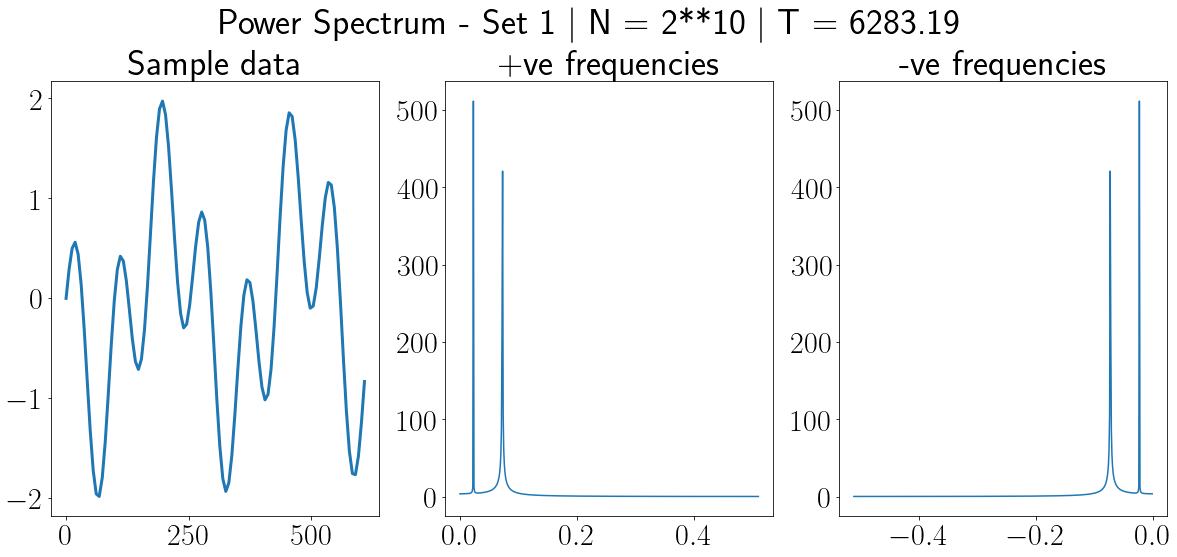

In [29]:
k=[10]          # intevals
t=[1000]
i=[1]

for t,k,i in zip(t,k,i):
    w=1          # signal frequency
    Tp=2*np.pi/w  # signal time period
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency 
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X) + np.sin(np.pi*X)
    YP=np.abs(fft.fft(Y))
    WP=np.arange(0,wmax,wo)  # taking the positive side
    WN=np.arange(-wmax,0,wo) # taking the negative side
    fig,(ax,ax1,ax2)=plt.subplots(1,3)
    plt.suptitle(r'Power Spectrum - Set %i $|$ N = 2**%i $|$ T = %0.2f'%(i,k,T),y=1.01)
    ax.plot(X[:100],Y[:100],linewidth=3)
    ax.set_title('Sample data')
    ax1.plot(WP,YP[:Nh])
    ax1.set_title('+ve frequencies')
    ax2.plot(WN,YP[Nh:])
    ax2.set_title('-ve frequencies')
    plt.show()

# $$ \text{ASSIGNMENT 4} $$
## $$\text{2D & 3D Integration using scipy.integration method}$$

Q1. Find the total charge on an elliptical surface defined by $\displaystyle{\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1}$. Where the charge density is $\displaystyle{ρ(x, y) = exp −(x^2 + y^2)}$

Charge Density: $\rho=\frac{q}{A}$ where, q is the charge and A is the area of the surface. 
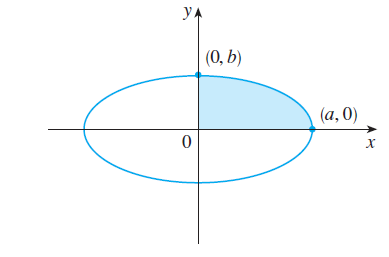

Calculating the area in the first quadrant using double integral and multiply by 4 $,i.e., \displaystyle\large{A= \int_{-a}^{a} \int_{-b \sqrt{1-\frac{x^2}{a^2}}}^{b \sqrt{1-\frac{x^2}{a^2}}} \text{ d}y \text{ d}x}$

In [30]:
a,b = 1,2         # input initial value
f1  = lambda y, x: np.exp(-(x**2+y**2))*((x**2)/(a**2))+((y**2)/(b**2)) # f = charge density * area
Q1  = (si.dblquad(f1,-a, a, lambda x:-(b/a)*(((a**2)-(x**2))**0.5), lambda x:(b/a)*(((a**2)-(x**2))**0.5))[0]) # charge
print('q =',Q1,'C')   

q = 2.156579168296644 C


Q2. Electric field at some region is given as $\displaystyle{\vec{E}= 3 (r^2 \cos^2 θ − 1) \hat{r}+ 2 r^2 \sinθ \hat{θ}}$. 
Find the total charge within a sphere of radius 2.

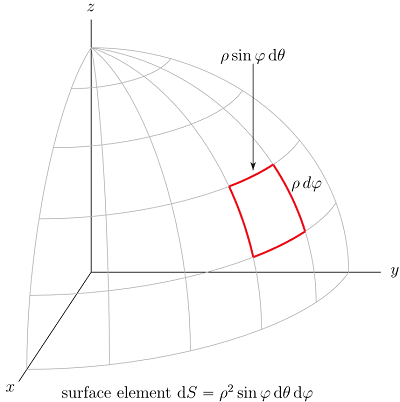


$ \displaystyle \newcommand{\ud}{\,\mathrm{d}} {\\  
 \oint\vec{E}\cdot\ud\vec{s}=\frac{Q}{\epsilon_0} => Q= \oint\epsilon_0\vec{E}\cdot\ud\vec{s}} $
 
 $ \displaystyle{\text{permittivity of free space : }\epsilon_0 = 8.85 * 10^{-12} C^2/Nm^2 
\text{ and for sphere : } \ud \vec{s}=r^2\sin\theta \ud \theta \ud \phi \ud r \hat{r} }$

$ \displaystyle{ \vec{E} \cdot \ud \vec{s} = (3 (r^2 \cos^2 θ − 1) \hat{r}+ 2 r^2 \sinθ \hat{θ}) \cdot (r^2\sin\theta \ud \theta \ud \phi \hat{r})= (3 (r^2 \cos^2 θ − 1) )\times(r^2\sin\theta \ud \theta \ud \phi )}$

$ \displaystyle{ \text{as } \hat{r}\cdot\hat{r}=1,\hat{\theta}\cdot\hat{\theta}=1,\hat{\phi}\cdot\hat{\phi}=1,\hat{r}\cdot\hat{\theta}=0,\hat{r}\cdot\hat{\phi}=0,\hat{\theta}\cdot\hat{\phi}=0}$

$ \displaystyle{Q = \iint \epsilon_0 \vec{E} \cdot \ud \vec{s} = \iint 3 \epsilon_0 (r^2 \cos^2 θ − 1) \times r^2\sin\theta \ud \theta \ud\phi }$

In [31]:
r  = 2                          # given radius
E0 = 8.85 * 10**(-12)           # permittivity of free space
f2 = lambda phi, th : np.dot(E0*(3*((r**2*np.cos(th)**2)-1)), np.sin(th)*r**2)  # 𝜖0E⋅ ds
Q2 = si.dblquad(f2, 0, np.pi, lambda phi: 0, lambda phi: 2*np.pi)   # total charge
print('q =',Q2[0],'C')

q = 4.4484951974831474e-10 C


Q3. Hydrogen atom wave function in $2p_{0}$ state is given by $\displaystyle{ψ_{2p_0} = \frac{1}{4 \sqrt{2\pi}} \sqrt{\frac{1}{a_0^3}} \frac{r}{a_0} \exp(− \frac{r}{2a_0})}$. 

Find the values of the uncertainties in $x$ and $z$ direction.
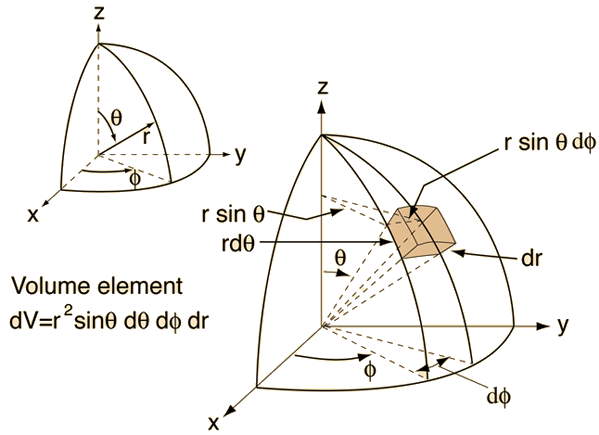                           

uncertainty of position : $ \displaystyle {\Delta{x} = \sqrt{<\hat{x}^2> - <\hat{x}>^2}}$



$\displaystyle { x=r\sin\theta \cos\phi \text{ and } z=r\cos\theta }$

$\displaystyle {\hat{x}^2> = \iiint (\psi_{2p_0})^2 r^2 \sin^2\theta  \cos^2\phi \cdot r^2 \sin \theta \text{ d}\theta \text{ d}\phi \text{ d}r }$

$\displaystyle {<\hat{x}>  = \iiint (\psi_{2p_0})^2 r \sin\theta \cos\phi \cdot r^2 \sin \theta \text{ d}\theta \text{ d}\phi \text{ d}r}$

$\displaystyle {<\hat{z}^2> = \iiint (\psi_{2p_0})^2 r^2 \cos^2\theta \cdot r^2 \sin\theta \text{ d}\theta \text{ d}\phi \text{ d}r }$

$\displaystyle {<\hat{z}>  = \iiint (\psi_{2p_0})^2 r \cos\theta \cdot r^2 \sin\theta \text{ d}\theta \text{ d}\phi \text{ d}r}$

In [32]:
a0  = 1
fx2 = lambda t,f,r:(1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0))*r*np.sin(f)*np.cos(t))**2*r**2*np.sin(f)
x2  = si.tplquad(fx2,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,f:0,lambda r,f:np.pi*2)[0]   # <𝑥̂²>
fx1 = lambda t,f,r:(1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0)))**2*r*np.sin(f)*np.cos(t)*r**2*np.sin(f)
x1  = si.tplquad(fx1,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,f:0,lambda r,f:np.pi*2)[0]   # <𝑥̂ >
dx  = (x2-(x1**2))**0.5     # Δ𝑥
print('<𝑥̂>:',x1,'\t<𝑥̂\u00b2>:',x2,'\tdx:\u221A{<𝑥̂\u00b2>-<𝑥̂>\u00b2} =',dx)

fz2 = lambda t,f,r: (1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0))*r*np.cos(f))**2*r**2*np.sin(f)
z2  = si.tplquad(fz2,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,t:0,lambda r,t:np.pi*2)[0]   # <𝑧̂²>
fz1 = lambda t,f,r: (1/(4*(2*np.pi)**0.5)*(1/(a0**3))**0.5*(r/a0)*np.exp(-r/(2*a0)))**2*r*np.cos(f)*r**2*np.sin(f)
z1  = si.tplquad(fz1,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,f:0,lambda r,f:np.pi*2)[0]   # <𝑧̂ >
dz  = (z2-(z1**2))**0.5     #  Δz
print('<𝑧̂>:',z1,'\t<𝑧̂\u00b2>:',z2,u'\tdz:\u221A{<𝑧̂\u00b2>-<𝑧̂>\u00b2} =',dz)

<𝑥̂>: 4.549610406684606e-16 	<𝑥̂²>: 30.0 	dx:√{<𝑥̂²>-<𝑥̂>²} = 5.477225575051661
<𝑧̂>: 7.468401574530467e-16 	<𝑧̂²>: 30.0 	dz:√{<𝑧̂²>-<𝑧̂>²} = 5.477225575051661


# $$ \text{ASSIGNMENT 5} $$
### $$\textit{Roots Searching using Bisection, Regula False, Secant and Newton Raphson methods}$$

In [33]:
def bisection(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = (a_n + b_n)/2
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            print("Found exact solution.")
            return c_n
        else:
            print("Bisection method fails.")
            return None
    return (n,(a_n + b_n)/2)

def secant(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            return (n,c_n)
        else:
            print("Secant method fails.")
            return None
    return (n,a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n)))

def regulaFalsi(f,a,b,TOL,N):
    for n in range(0,N):
        while abs(b-a) > TOL:
            c = (a*f(b)-b*f(a))/(f(b) - f(a))
            FA = f(a)
            Fc = f(c)
            if(Fc == 0) :
                break
            if(f(a)*f(b)) > 0:
                break
            if(FA*Fc > 0):
                a = c
            else:
                b = c
    return (n,c)

def newtonRaphson(f,Df,x0,TOL,N):
    xn = x0
    for n in range(0,N):
        fxn = f(xn)
        if abs(fxn) < TOL:
            return (n,xn)
        Dfxn = Df(xn)
        xn = xn - fxn/Dfxn
    return (n,xn)

Q1. When you deduce Wien’s displacement law from Planck’s law, you finally arrive at an equation $x=3(1-\exp(-x))$ , where $x=\large\frac{\hbar\omega_m}{kT}$.                                                                                         
Solve this equation to deduce Wien’s displacement law.

In [34]:
f=lambda x:3*(1-np.exp(-x))-x
Df=lambda x:(3*np.exp(-x))-1

a,b = 1,100
TOL,N=1e-15,25
x=np.linspace(0,3,10000)

A=["bisection","secant","regulaFalsi","newtonRaphson"]
A1=bisection(f,a,b,N)
A2=secant(f,a,b,N)
A3=regulaFalsi(f,a,b,TOL,N)
A4=newtonRaphson(f,Df,x0=a+0.5,TOL=1e-15,N=25)
print('_________________________________________________________________________')
print('| s.No.','|\t','method','\t| ','itterations','\t|',' roots ',' \t\t|')
for i in range(4):
    B=[A1,A2,A3,A4]
    print('| --------------------------------------------------------------------- |')
    print('| ',i,'\t|\t',A[i],'\t|  ',B[i][0],'\t\t|',B[i][1],'\t|')
print('|_______________________________________________________________________|')    

_________________________________________________________________________
| s.No. |	 method 	|  itterations 	|  roots   		|
| --------------------------------------------------------------------- |
|  0 	|	 bisection 	|   25 		| 2.8214405328035355 	|
| --------------------------------------------------------------------- |
|  1 	|	 secant 	|   22 		| 2.8214393721220787 	|
| --------------------------------------------------------------------- |
|  2 	|	 regulaFalsi 	|   24 		| 2.8214393721220787 	|
| --------------------------------------------------------------------- |
|  3 	|	 newtonRaphson 	|   5 		| 2.821439372122079 	|
|_______________________________________________________________________|


Q2. Single slit diffraction patterns are found to be proportional to $\large(\frac{\sin{x}}{x})^2$.                         
Find the first three position of the maximum for $x>0$ by **Bisection, Regula False,Secant and Newton Raphson methods**

_________________________________________________________________________________________________________
|Root | Bisection Method 	| Secant Method	 	| Regula Falsi Method 	| Newton Raphson Method |
|-------------------------------------------------------------------------------------------------------|
| 1st | 4.493409457909063 	| 4.481592653589793 	| 4.556311455491648 	| 4.71238898038469 	|
|-------------------------------------------------------------------------------------------------------|
| 2nd | 7.725251836937707 	| 7.623185307179586 	| 7.637196614143048 	| 7.853981633974483 	|
|-------------------------------------------------------------------------------------------------------|
| 3rd | 10.904121659428899 	| 10.76477796076938 	| 10.81050225500054 	| 10.995574287564276 	|
|_______________________________________________________________________________________________________|


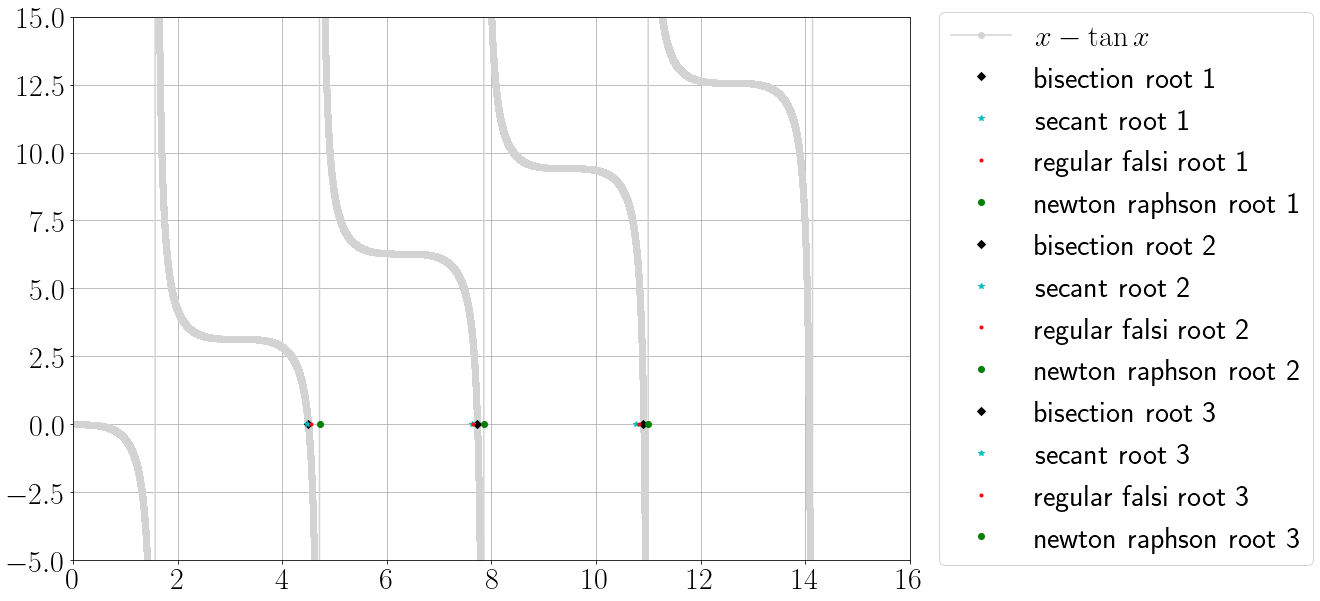

In [35]:
def f(x):
    try :
        y =  x - np.tan(x)
    except:
        y = 0
    return y

def g(x):
    try :
        y = (-np.tan(x))**2
    except:
        y = 0
    return y 

x=np.arange(0,18*np.pi,0.0001)
y=f(x)

TOL,N=1e-6,900
A=[np.pi,2*np.pi,3*np.pi]
B=[3*np.pi/2,5*np.pi/2,7*np.pi/2]
C=[4.3,7.4,10.6]
D=[4.7,7.9,11.1]
s=['1st','2nd','3rd']
plt.figure(figsize=(15,10))
plt.ylim(-5,15)
plt.xlim(0,16)
plt.plot(x,y,'o-',label=r'$x-\tan x$',color='lightgrey')
T1,T2,T3,T4=[],[],[],[]
for a,b,c,d in zip(A,B,C,D):
    T1.append(bisection(f,a,b,N)[1])
    T2.append(secant(f,a+1.34,b,N)[1])
    T3.append(regulaFalsi(f,c+.26,d,TOL,N)[1])
    T4.append(newtonRaphson(f,g,d-0.1,TOL,N)[1])
print('_________________________________________________________________________________________________________')
print('|Root','| Bisection Method','\t|','Secant Method\t','\t|','Regula Falsi Method','\t|','Newton Raphson Method |') 
for i in range(3):    
    print('|-------------------------------------------------------------------------------------------------------|')
    print('|',s[i],'|',T1[i],'\t|',T2[i],'\t|',T3[i],'\t|',T4[i],'\t|')
    plt.plot(T1[i],x[i],'kD',label='bisection root %i'%(i+1))
    plt.plot(T2[i],x[i],'c*',label='secant root %i'%(i+1))
    plt.plot(T3[i],x[i],'r.',label='regular falsi root %i'%(i+1))
    plt.plot(T4[i],x[i],'go',label='newton raphson root %i'%(i+1))
print('|_______________________________________________________________________________________________________|')
plt.legend(bbox_to_anchor=(1.5, 0.5),fontsize=30,loc='center right')
plt.grid()
plt.show()   

Q3.$f(x)=\sin x$ has a root at $x=\pi$. Try Newton Raphson method to find this root with different guess values $x_o\in\large(\frac{\pi}{2},\frac{3\pi}{2})$.                                                                               
Output your value of the root in the form of a table.

In [36]:
x   = np.linspace(np.pi/2+0.01,3*np.pi/2+1,20)

print('\n\t\t\t*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
print('_________________________________________________________________________________________') 
print('|\tGuess value','\t\t|','Itterations','\t|\t','Root','\t\t\t\t|')
for x0 in x:
    NR =  newtonRaphson(lambda x: np.sin(x),lambda x: np.cos(x),x0,TOL = 1e-10,N = 10)
    print('|---------------------------------------------------------------------------------------|')
    print('|\t', x0, '\t|\t', NR[0], '\t|\t', NR[1],'\t\t|')
print('|_______________________________________________________________________________________|')    


			*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
_________________________________________________________________________________________
|	Guess value 		| Itterations 	|	 Root 				|
|---------------------------------------------------------------------------------------|
|	 1.5807963267948966 	|	 6 	|	 100.53096491487338 		|
|---------------------------------------------------------------------------------------|
|	 1.798248571720675 	|	 4 	|	 6.283185307179586 		|
|---------------------------------------------------------------------------------------|
|	 2.015700816646454 	|	 5 	|	 3.141592653589801 		|
|---------------------------------------------------------------------------------------|
|	 2.2331530615722324 	|	 4 	|	 3.141592653589793 		|
|---------------------------------------------------------------------------------------|
|	 2.450605306498011 	|	 4 	|	 3.141592653589793 		|
|---------------------------------------------------------------------------------------|
|	 2.668

$\text{Comments : Newton-Raphson Method does not gurantee to find same root for every possible limit}$

### Multi Dimensional Newton Raphson Method

Let us assume that our guess values be $(x_0,y_0)$ while the roots are at $(x^*,y^*)$. 

Let us expand $f(x,y)$ and $g(x,y)$ around upto first order $(x_0,y_0)$.

Let $\displaystyle{x^*=x_0+\eta}$ and $\displaystyle{y^*=y_0+\xi} $

$\displaystyle{f(x,y)=f(x_0,y_0)+(x-x_0)\frac{\partial{f}}{\partial{x}}|_{(x_0,y_0)}+(y-y_0)\frac{\partial{f}}{\partial{y}}|_{(x_0,y_0)} }$

$\displaystyle{f(x^*,y^*)=0=f(x_0,y_0)+\eta\frac{\partial{f}}{\partial{x}}|_{(x_0,y_0)}+\xi\frac{\partial{f}}{\partial{y}}|_{(x_0,y_0)}} $

$\displaystyle{g(x^*,y^*)=0=g(x_0,y_0)+\eta\frac{\partial{g}}{\partial{x}}|_{(x_0,y_0)}+\xi\frac{\partial{g}}{\partial{y}}|_{(x_0,y_0)}}$

If $(x^*,y^*)$ is not the root then iterate again taking $\displaystyle{(x_0,y_0)=(x^*,y^*)}$

Stop if root is found at $\displaystyle{abs(f(x^*,y^*))<tolerance}$ and $\displaystyle{abs(g(x^*,y^*))<tolerance}$

In [8]:
def MD(f,a,root,guess_interval):
    A=[]
    while len(A) < root:
        b=a + guess_interval
        x0=a
        x1=b
        fx0=f(x0)
        fx1=f(x1)  
        if f(x0)*f(x1) < 0:
            while abs(f(x1))>1e-8:
                x2=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
                x0,x1=x1,x2
                fx0,fx1=f(x1),f(x2)
            A.append(x2)    
        a=b
    return A

Q4. Find all four roots of
$$ x^2+y^2=16,\qquad x*y=2$$
Compare this with your graphical analysis. (Use one of the bracketing methods)

  Theoritical & Graphical Study using Multi-Dimensional Method
_________________________________________________________________
|		 x_0		|		 y_0		|
|	----------------------------------------------------	|
|	 -3.968118785067315 	|	 -0.5040171699310841 	|
|	----------------------------------------------------	|
|	 -0.5040171699309133 	|	 -3.96811878506866 	|
|	----------------------------------------------------	|
|	 0.5040171699310768 	|	 3.9681187850673725 	|
|	----------------------------------------------------	|
|	 3.968118785066384 	|	 0.5040171699312024 	|
|_______________________________________________________________|


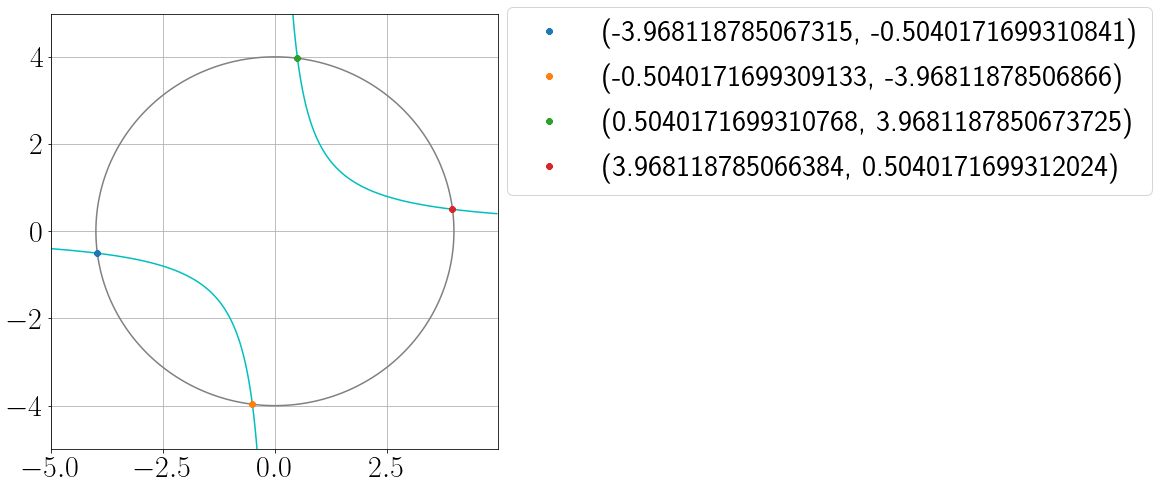

In [9]:
def f(x):
    return (x**2+(2/x)**2)-16

Roots = MD(f, a = -5, root = 4, guess_interval = 0.4)

delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(-5, 5, delta)
yrange = np.arange(-5, 5, delta)
X, Y = np.meshgrid(xrange,yrange)
G = X * Y
F = X**2 + Y**2 
plt.contour( X, Y, F, [16], colors='grey')
plt.contour( X, Y, G,[2], colors='c')

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
print('_________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0\t\t|')
for i in Roots:
    print('|\t----------------------------------------------------\t|')
    print('|\t',i,'\t|\t',2/i,'\t|')
    plt.plot(i,2/i,'8',label=(i,2/i))
print('|_______________________________________________________________|') 
plt.grid(True)
plt.legend(bbox_to_anchor=(2.5, 0.8),fontsize=30,loc='center right')
plt.show()

Q5. Find the complex root of
$$z^3+2z^2+1=0$$
Hint: write $z=x+iy$ and then separate the given equation into real and imaginary parts. You will get two equations involving $x, y.$

In [10]:
f= lambda x,y :x**3-3*x*y**2+2*x**2-2*y**2+1
g= lambda x,y :3*x**2*y-y**3+4*x*y
tol = 1e-6

def multdim(f,g,x0,y0):
    while abs(f(x0,y0)) > tol and abs(g(x0,y0)) > tol :
        dfdx=2*x0**2-6*y0**2+4*x0
        dfdy=-6*x0*y0-4*y0
        dgdx=6*x0*y0+4*y0
        dgdy=3*x0**2-3*y0**2+4*x0
        a=g(x0,y0)*dfdy-f(x0,y0)*dgdy
        b=f(x0,y0)*dgdx-g(x0,y0)*dfdx
        c=(dfdx*dgdy)-(dgdx*dfdy)
        h=a/c
        k=b/c
        x0=float(x0+h)
        y0=float(y0+k)
    return x0,y0

print('\tTheoritical Study using Multi-Dimensional Method')
print('__________________________________________________________________________________')
print('|\t\t x_0 \t\t\t|\t\t y_0 \t\t\t |')
A=[0.00,0.00,1.00,-1.00]
B=[1.00,-1.00,0.00,0.00]
for i,j in zip(A,B):
    print('|\t-----------------------------------------------------------------\t |')
    print('|\t','\t %.4f'%multdim(f,g,i,j)[0],'\t\t|\t\t %.4f'%multdim(f,g,i,j)[1],' \t\t |')
print('|________________________________________________________________________________|')    

	Theoritical Study using Multi-Dimensional Method
__________________________________________________________________________________
|		 x_0 			|		 y_0 			 |
|	-----------------------------------------------------------------	 |
|	 	 0.1028 		|		 0.6654  		 |
|	-----------------------------------------------------------------	 |
|	 	 0.1028 		|		 -0.6654  		 |
|	-----------------------------------------------------------------	 |
|	 	 1.0000 		|		 0.0000  		 |
|	-----------------------------------------------------------------	 |
|	 	 -1.0000 		|		 0.0000  		 |
|________________________________________________________________________________|


Q6.Solve the equation to find first three roots. & Compare this with your graphical analysis. :
$$ x\tan x=y,\qquad x^2+y^2=a^2$$
(Hint Eliminate and form an equation of a single variable, Use one of the bracketing methods).

  Theoritical & Graphical Study using Multi-Dimensional Method
_________________________________________________________________
|		 x_0		|		 y_0		|
|	----------------------------------------------------	|
|	 1.3954661438718818 	|	 7.877351981555493 	|
|	----------------------------------------------------	|
|	 4.1648309140611435 	|	 6.830386772160378 	|
|	----------------------------------------------------	|
|	 6.830674326219107 	|	 4.1643592845256 	|
|_______________________________________________________________|


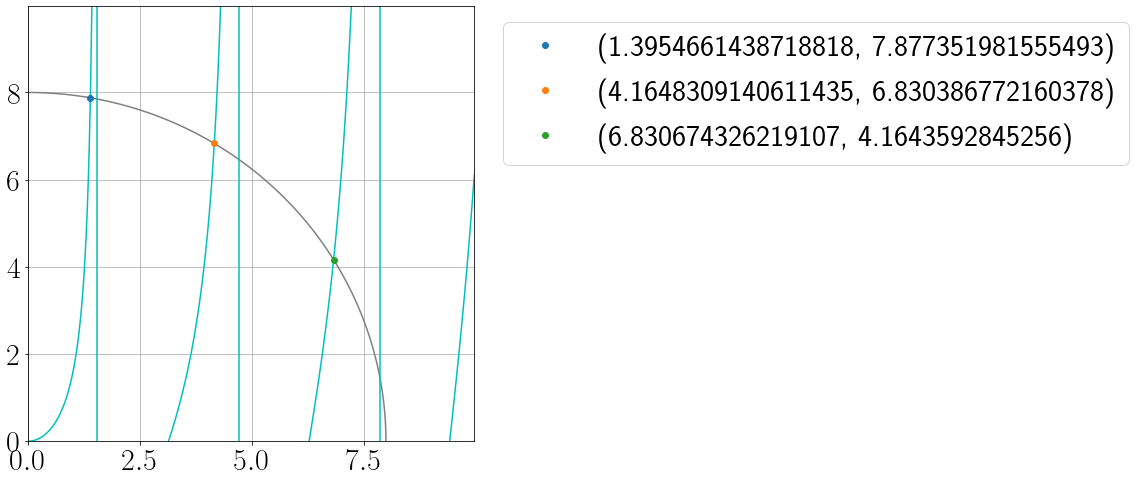

In [40]:
delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(0, 10, delta)
yrange = np.arange(0, 10, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X*np.tan(X)) - Y
F = (X**2) + (Y**2)
plt.contour(X, Y, F, [64], colors='grey')
plt.contour(X, Y, G, [0], colors='c')

def f(x):
    return (x**2*(1+(np.tan(x))**2))-64

Roots = MD(f, a = 1, root = 5, guess_interval = 0.4)

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
print('_________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0\t\t|')
for i in Roots:
    if (i>0) and (i*np.tan(i)>0):
        print('|\t----------------------------------------------------\t|')
        print('|\t',i,'\t|\t',(i*np.tan(i)),'\t|')
        plt.plot(i,(i*np.tan(i)),'o',label=(i,(i*np.tan(i))))
print('|_______________________________________________________________|')    
plt.grid(True)
plt.legend(bbox_to_anchor=(2.5, 0.8),fontsize=30,loc='center right')
plt.show()

Q7.Solve the equation to find first three roots. & Compare this with your graphical analysis. :
$$ x\cot x=-y,\qquad x^2+y^2=a^2$$
(Hint Eliminate and form an equation of a single variable, Use one of the bracketing methods)

  Theoritical & Graphical Study using Multi-Dimensional Method
_________________________________________________________________
|		 x_0		|		 y_0		|
|	----------------------------------------------------	|
|	 2.785902114077721 	|	 7.4992499232066985 	|
|	----------------------------------------------------	|
|	 5.521446429976286 	|	 5.7890957256638576 	|
|	----------------------------------------------------	|
|	 7.957321494203172 	|	 0.82524822803156 	|
|_______________________________________________________________|


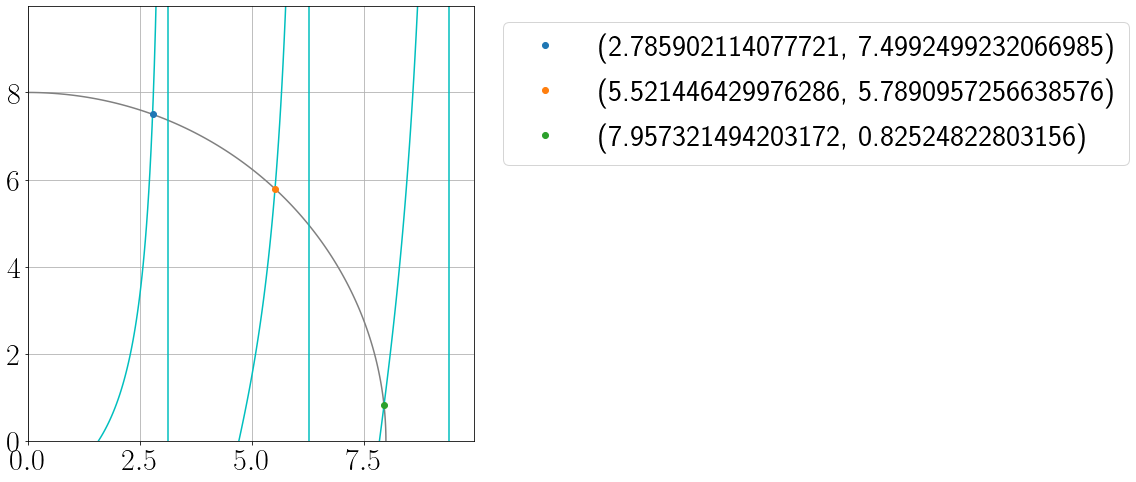

In [11]:
delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(-0, 10, delta)
yrange = np.arange(-0, 10, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X/np.tan(X))+Y
F = (X**2)+(Y**2)
plt.contour(X, Y,F, [64], colors='grey')
plt.contour(X,Y,G,[0], colors='c')

def f(x):
    return (x**2*(1+(1/(np.tan(x)))**2))-64

Roots = MD(f, a = 1, root = 5, guess_interval = 0.4)

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
print('_________________________________________________________________')
print('|\t\t x_0\t\t|\t\t y_0\t\t|')
for i in Roots:
    if (i>0) and (-i/np.tan(i)>0) :
        print('|\t----------------------------------------------------\t|')
        print('|\t',i,'\t|\t',(-i/np.tan(i)),'\t|')
        plt.plot(i,(-i/np.tan(i)),'o',label=(i,(-i/np.tan(i))))
print('|_______________________________________________________________|')    
plt.grid(True)
plt.legend(bbox_to_anchor=(2.5, 0.8),fontsize=30,loc='center right')
plt.show()

Q8. Energy levels of a particle in a spherical box is given by the equation $j_l(ka)=0$                                    
Where $j_l(x)$ is Spherical Bessel Function of order $l$. There are infinite number of roots for a given $l$.               
Find the first three roots for each value of $l\in[0,1,2]$.                                                                
Energy is given by $\large\frac{\hbar^2(ka)^2}{2ma^2}$. Label the states and arrange them in the increasing value of energy.

For Spherical Bessel function $:\\ \qquad\qquad $
`from scipy.special import spherical_jn`

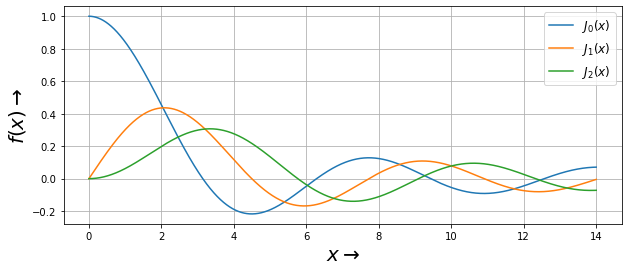

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn

x=np.linspace(0,14,50000)

plt.figure(figsize=(10,4))
for l in range(3):
    plt.plot(x, spherical_jn(l,x), label=r'${J}_%i(x)$'%l)
plt.grid()
plt.legend(fontsize=12)
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.show( )


def bisection(f,a,b,tol):
    while (abs(a-b)>=tol):
        c=(a+b)/2
        if (f(a)*f(c)) > tol:
            a=c
        elif (f(a)*f(c)) < tol:  
            b=c
    return c

First three roots of j_{0}(ka)  : [3.14, 6.28, 9.42]
First three roots of j_{1}(ka)  : [4.49, 7.72, 10.89]
First three roots of j_{2}(ka)  : [5.76, 9.09, 12.31]


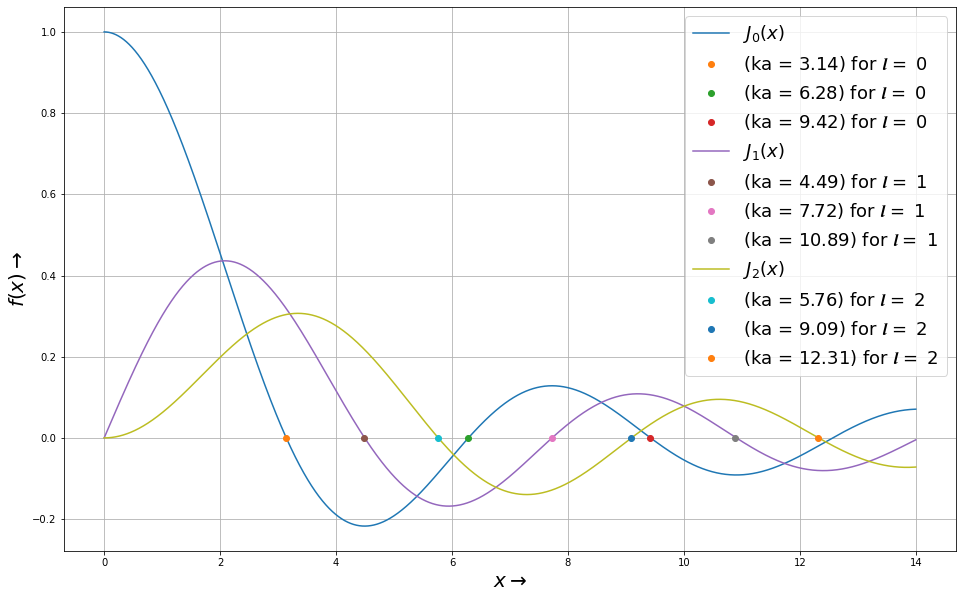

In [2]:
np.set_printoptions(precision=2, suppress=True)
plt.figure(figsize=(16,10))
P=[r'$J_0(x)$',r'$2J_0(x)$',r'$3J_0(x)$',r'$J_1(x)$',r'$2J_1(x)$',r'$3J_1(x)$',r'$J_2(x)$',r'$2J_2(x)$',r'$3J_2(x)$']
T=[]
for l in range(3):
    plt.plot(x,spherical_jn(l,x),label=r'${J}_%i(x)$'%l)
    L1=[]
    for i in range(1,11):
        s=bisection(lambda x:spherical_jn(l,x),i,6+i,1e-6)
        #print('bisection(lambda x:spherical_jn(%i,x),%0.1f,%i,1e-8) :'%(l,i,i+7),s)
        L1.append(round(s,2))
    ka=[i for n, i in enumerate(L1) if i not in L1[:n]]
    ka=[i for i in ka[:3]]
    print('First three roots of j_{%i}(ka)  :'%l,ka)
    T += ka
    for k in range(len(ka)):
        plt.plot(ka[k],0,'o',label=r'(ka = %0.2f) for $𝒍 =$ %i '%(ka[k],l))
plt.grid()
plt.xlabel(r'$x\rightarrow$',fontsize=20)
plt.ylabel(r'$f(x)\rightarrow$',fontsize=20)
plt.legend(fontsize=18)
plt.show()

In [3]:
Y=zip(P,T)
Z=sorted(Y,key= lambda x:x[1])
Z

[('$J_0(x)$', 3.14),
 ('$J_1(x)$', 4.49),
 ('$J_2(x)$', 5.76),
 ('$2J_0(x)$', 6.28),
 ('$2J_1(x)$', 7.72),
 ('$2J_2(x)$', 9.09),
 ('$3J_0(x)$', 9.42),
 ('$3J_1(x)$', 10.89),
 ('$3J_2(x)$', 12.31)]

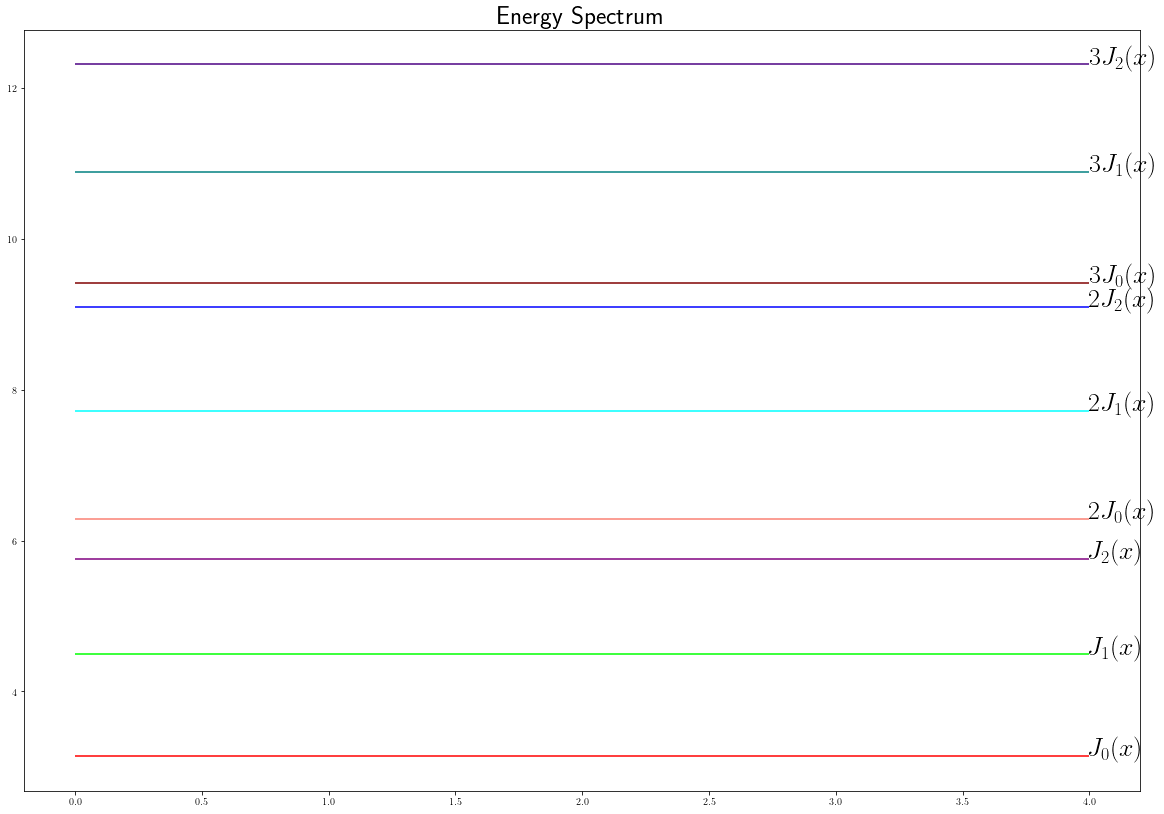

In [4]:
c = ['red','salmon','maroon','lime','cyan','teal','purple','blue','indigo']
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(20,14))
plt.hlines(y=T,xmin=0,xmax=4,color=c,linestyle='-')
for n in range(len(T)):
    plt.text(4,T[n],P[n],size=26)
plt.title('Energy Spectrum',fontsize=25)
plt.show()

# $$ \text{ASSIGNMENT 6} $$
## $$\text{Linear Algebra}$$

In [2]:
np.set_printoptions(precision = 2, suppress = True)

Q1.Using **Gauss elimination method** to form a upper triangulation of matrix  .      
And find the **determinant** by multiplying its diagonal and check using `np.linalg.det()`

In [3]:
def gauss(a):
    m, n = a.shape               
    M = a.copy()
    print('\nGaussian elimination:\n$ Original matrix $')
    display(Math(r'A = '+latex(sp.Matrix(M))))
    print('# starting the elimination of matrix ') 
    for k in range(n):                        
        for j in range(k+1,n):                      
            q = float(M[j][k]) / M[k][k]  # lambda
            for m in range(k, n): 
                M[j][m] -=  q * M[k][m]     
    print('^^ this is the outstanding matrix from Gauss elimation ^^')           
    display(Math(r'A = '+latex(sp.Matrix(M))))
    display(Math(r'|A| = '+latex(N(sp.det(sp.Matrix(M)),2))))
    return None

In [4]:
A = np. array([[ 1., 0., 0., 0.],
               [ 2., 2., 0., 0.],
               [ 3., 6., 3., 0.],
               [ 5., 3., 2., 4.]])

gauss(A)
print('****************************************')
print('using np.linalg.det(A) :')
display(Math(r'|A| = '+latex(np.linalg.det(A))))
print('****************************************')


Gaussian elimination:
$ Original matrix $


<IPython.core.display.Math object>

# starting the elimination of matrix 
^^ this is the outstanding matrix from Gauss elimation ^^


<IPython.core.display.Math object>

<IPython.core.display.Math object>

****************************************
using np.linalg.det(A) :


<IPython.core.display.Math object>

****************************************


Q2. Using **Gauss elimination method** to solve a system of equation by **backward substitution** method   .               
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [5]:
def gauss_elmbk(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b))                      #augmented_mat
    print('\nGaussian elimination  and back substitution:\n$ Original augmented matrix $')
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    print('# starting the elimination of matrix ') 
    for k in range(n):                       
        for j in range(k+1,n):                      
            q = float(M[j][k]) / M[k][k]       # lambda
            for m in range(k, n+1):    # Forward Elimination - Subtracting rows
                M[j][m] -=  q * M[k][m] 
    print('^^ this is the outstanding augmented matrix from Gauss elimation ^^')           
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    x = np.zeros(n)
    print('\n# From Backwards Substitution:')      
    x[n-1] = float(M[n-1][n]) / M[n-1][n-1]  
    for i in range (n-1,-1,-1):                 # Backwards Substitution 
        z = 0.0                                     
        for j in range(i+1,n):                     
            z = z  + float(M[i][j])*x[j]   
        x[i] = float(M[i][n] - z) / M[i][i]
        display(Math(r'\qquad\qquad x_{%i} = '%(i+1)+latex(x[i])))
    display(Math(r'X = '+latex(sp.Matrix(x))))
    print('# checking if AX == b :')
    display(Math(r'A\cdot X ='+latex(sp.Matrix(np.dot(a,x.reshape(n,1))))))
    return None

In [6]:
A = np. array([[  1.,  2., -1.,  1.],
               [ -1.,  1.,  2., -1.],
               [  2., -1.,  2.,  2.],
               [  1.,  1., -1.,  2.]])

b = np. array([ 6., 3., 14., 8.])

gauss_elmbk(A, b)
print('**************************************************************')
print("direct read using numpy.linalg.solve()")
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')


Gaussian elimination  and back substitution:
$ Original augmented matrix $


<IPython.core.display.Math object>

# starting the elimination of matrix 
^^ this is the outstanding augmented matrix from Gauss elimation ^^


<IPython.core.display.Math object>


# From Backwards Substitution:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# checking if AX == b :


<IPython.core.display.Math object>

**************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

**************************************************************


Q3.Using **Gauss elimination method with pivot and backward substitution method** to solve a system of equation .           
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [7]:
def gauss_pivot(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b))                   #augmented_mat
    print('\nGaussian elimination (with Pivotting):\n$ Original augmented matrix $')
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    print('# starting the elimination of matrix ') 
    def swaprows(v,i,j):
        if len(v.shape) == 1: v[i],v[j] = v[j],v[i]
        else:   v[[i,j],:] = v[[j,i],:]
    s = np.zeros(n)
    for i in range(n):  s[i] = max(np.abs(M[i,:]))
    for k in range(n):       
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k   # row interchange, if needed
        if p != k: swaprows(M,k,p)
        for j in range(k+1,n):  
            q = float(M[j][k]) / M[k][k]        # lambda
            for m in range(k, n+1): M[j][m] -=  q * M[k][m] # Forward Elimination - Subtracting rows
    print('^^ this is the outstanding augmented matrix from Gauss elimation ^^')           
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    x = np.zeros(n)
    print('# From Backwards Substitution:')      
    x[n-1] =float(M[n-1][n]) / M[n-1][n-1]  
    for i in range (n-1,-1,-1):                         # Backwards Substitution         
        z = 0.0                                     
        for j in range(i+1,n): z = z  + float(M[i][j])*x[j]   
        x[i] = float(M[i][n] - z) / M[i][i]
        display(Math(r'\qquad\qquad x_{%i} = '%(i+1)+latex(x[i])))
    display(Math(r'X = '+latex(sp.Matrix(x))))
    print('# checking if AX == b :')
    display(Math('A\cdot X = '+latex(sp.Matrix(np.dot(a,x.reshape(n,1))))))
    return None             

In [8]:
A = np. array([[  1.,  2., -1.,  1.],
               [ -1.,  1.,  2., -1.],
               [  2., -1.,  2.,  2.],
               [  1.,  1., -1.,  2.]])

b = np.array([ 6., 3., 14., 8.])

gauss_pivot(A, b)
print('**************************************************************')
print("direct read using numpy.linalg.solve()")
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')


Gaussian elimination (with Pivotting):
$ Original augmented matrix $


<IPython.core.display.Math object>

# starting the elimination of matrix 
^^ this is the outstanding augmented matrix from Gauss elimation ^^


<IPython.core.display.Math object>

# From Backwards Substitution:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# checking if AX == b :


<IPython.core.display.Math object>

**************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

**************************************************************


Q4.Using **Gauss elimination method** find the **inverse of matrix** and verify **$A.A^{-1} = \text{I}$** and check using `np.linalg.inv()`

In [9]:
def gauss_elmbk_matrix_inverse(a):
    m, n = a.shape               
    b = np.identity(len(a))
    M = np.hstack((a,b))                        #augmented_mat
    print('\nGauss elimination method of matrix inverse:\n$ Original augmented matrix $')
    display(Math(r'A|I = '+latex(sp.Matrix(M))))
    print('# starting the elimination of matrix ') 
    for k in range(n+len(a)):                  
        for j in range(k+1,n):                      
            q = float(M[j][k]) / M[k][k]        # lambda
            for m in range(k, n+len(a)):        # Forward Elimination - Subtracting rows 
                M[j][m] -=  q * M[k][m]  
    print('^^ this is the outstanding augmented matrix from Gauss elimation ^^')           
    display(Math(r'A|I = '+latex(sp.Matrix(M))))
    x = np.zeros(n)
    print('# From Backwards Substitution:') 
    for i in range(0, n):
        M[i] = M[i] / M[i][i]        
        for j in [k for k in range(0, n) if k != i]:
            M[j] = M[j] - M[i] * M[j][i]
    display(Math(r'I|A^{-1} = '+latex(sp.Matrix(M))))
    print('Inverse Matrix :') 
    display(Math(r'A^{-1} = '+latex(sp.Matrix(M[:, n:]))))  
    print('# Product of of original and inverse matrix,i.e., check A.A⁻¹ == I : ')
    display(Math(r'A \cdot A^{-1} = '+latex(sp.Matrix(np.dot(a,M[:, n:])))))
    return None

In [10]:
A = np. array([[ 1., 0., 0., 0.],
               [ 1., 1., 0., 0.],
               [ 1., 2., 1., 0.],
               [ 1., 3., 3., 1.]])

gauss_elmbk_matrix_inverse(A)
print('******************************************************')
print('Using the function for direct read numpy.linalg.inv():')
display(Math(r'A^{-1}= '+latex(sp.Matrix(np.linalg.inv(A)))))
print('******************************************************')


Gauss elimination method of matrix inverse:
$ Original augmented matrix $


<IPython.core.display.Math object>

# starting the elimination of matrix 
^^ this is the outstanding augmented matrix from Gauss elimation ^^


<IPython.core.display.Math object>

# From Backwards Substitution:


<IPython.core.display.Math object>

Inverse Matrix :


<IPython.core.display.Math object>

# Product of of original and inverse matrix,i.e., check A.A⁻¹ == I : 


<IPython.core.display.Math object>

******************************************************
Using the function for direct read numpy.linalg.inv():


<IPython.core.display.Math object>

******************************************************


Q5.Using **Gauss Jordan elimination** to solve a system of equation . And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [11]:
def gauss_jordan(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b))                      #augmented_mat
    print('\n Gauss Jordan elimination:\n$ Original augmented matrix $')
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    ol = [[0, m - 1, 1], [m - 1, 0, -1]]               #outer_loop
    for d in range(2):
        for i in range(ol[d][0], ol[d][1], ol[d][2]):
            il = [[i + 1, m, 1], [i - 1, -1, -1]]                #inner_loop
            for j in range(il[d][0], il[d][1], il[d][2]):
                k = (-1) * M[j, i] / M[i, i]
                temp_row = M[i, :] * k
                M[j, :] += temp_row
    for i in range(0, m):
        M[i, :] = M[i, :] / M[i, i]
    print('# Normalizing the rows')
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    print("# Now on extracting the %ith column from the above matrix we get X :"%(n+1))
    display(Math(r'X = '+latex(sp.Matrix(M[:, n]))))
    print('# checking if AX == b :')
    display(Math(r'A\cdot X = '+latex(sp.Matrix(np.dot(a,(M[:, n]).reshape(n,1))))))
    return None

In [12]:
A = np. array([[  1.,  2., -1.,  1.],
               [ -1.,  1.,  2., -1.],
               [  2., -1.,  2.,  2.],
               [  1.,  1., -1.,  2.]])

b = np. array([ 6., 3., 14., 8.])

gauss_jordan(A, b)

print('*************************************************************')
print(r'direct read using numpy.linalg.solve()')
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b))))) 
print('*************************************************************')


 Gauss Jordan elimination:
$ Original augmented matrix $


<IPython.core.display.Math object>

# Normalizing the rows


<IPython.core.display.Math object>

# Now on extracting the 5th column from the above matrix we get X :


<IPython.core.display.Math object>

# checking if AX == b :


<IPython.core.display.Math object>

*************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

*************************************************************


Q6. Using **Gauss Jordan elimination** find the **inverse of matrix** and verify **$A.A^{-1} = \text{I}$** and check using `np.linalg.inv()`

In [13]:
def gauss_jordan_matrix_inverse(a):
    m, n = a.shape              
    b = np.identity(len(a))
    M = np.hstack((a,b))           #augmented_matrix
    print('\nGauss Jordan method of matrix inverse:\n$ Original augmented matrix $')
    display(Math(r'A|I = '+latex(sp.Matrix(M))))
    ol = [[0, m - 1, 1], [m - 1, 0, -1]]           #outer_loop
    for d in range(2):
        for i in range(ol[d][0], ol[d][1], ol[d][2]):
            il = [[i + 1, m, 1], [i - 1, -1, -1]]       #inner_loop
            for j in range(il[d][0], il[d][1], il[d][2]):
                k = (-1) * M[j, i] / M[i, i]
                temp_row = M[i, :] * k
                M[j, :] += temp_row
    for i in range(0, m):
        M[i, :] = M[i, :] / M[i, i]
    print('\n# Normalizing the rows')
    display(Math(r'I|A^{-1} = '+latex(sp.Matrix(M)))) 
    print('\nINVERSE MATRIX IS:') 
    display(Math(r'A^{-1} = '+latex(sp.Matrix(M[:, n:]))))
    print('\n#product of of original and inverse matrix, i.e; check A.A⁻¹ == I')
    display(Math(r'A \cdot A^{-1} = '+latex(sp.Matrix(np.dot(a,M[:, n:])))))
    return None

In [14]:
A = np. array([[ 1., 0., 0., 0.],
               [ 1., 1., 0., 0.],
               [ 1., 2., 1., 0.],
               [ 1., 3., 3., 1.]])

gauss_jordan_matrix_inverse(A)
print('******************************************************')
print('Using the function for direct read numpy.linalg.inv():')
display(Math(r'A^{-1} = '+latex(sp.Matrix(np.linalg.inv(A)))))
print('******************************************************')


Gauss Jordan method of matrix inverse:
$ Original augmented matrix $


<IPython.core.display.Math object>


# Normalizing the rows


<IPython.core.display.Math object>


INVERSE MATRIX IS:


<IPython.core.display.Math object>


#product of of original and inverse matrix, i.e; check A.A⁻¹ == I


<IPython.core.display.Math object>

******************************************************
Using the function for direct read numpy.linalg.inv():


<IPython.core.display.Math object>

******************************************************


Q7. Using **Jacobi iterative method** to solve a system of equation And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [15]:
def jacobi_iterative(a,b,limit = 100):
    m,n = a.shape
    print('\nJacobi Iterative method : ')
    x = np.zeros_like(b)
    for it_count in range(limit+1):   
        x_new = np.zeros_like(x)
        for i in range(a.shape[0]):
            s1 = np.dot(a[i, :i], x[:i])
            s2 = np.dot(a[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
            if x_new[i] == x_new[i-1]:   # check for convergence
                break
        if np.allclose(x, x_new, atol=1e-10, rtol=0.):
            break
        x = x_new
    print('\nFinal output of x is :',x,'after {%i} count'%(it_count))
    print('\n# checking if AX == b :')
    display(Math(r'A\cdot X = '+latex((np.dot(a,x.reshape(n,1))))))
    return None

In [16]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

jacobi_iterative(A,b)
print('**************************************************************')
print(r'direct read using numpy.linalg.solve()')
display(Math(r'X=A^{-1}\cdot B = '+latex(np.linalg.solve(A, b))))
print('**************************************************************')


Jacobi Iterative method : 

Final output of x is : [ 1.  2. -1.  1.] after {28} count

# checking if AX == b :


<IPython.core.display.Math object>

**************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

**************************************************************


Q8.Using **Gauss Seidel iterative method** to solve a system of equation And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [17]:
def gauss_seidel(a,b,limit=1000):
    m,n = a.shape
    x = np.zeros_like(b)
    print('\nGauss Seidel method : ')
    for it_count in range(1, limit):
        x_new = np.zeros_like(x)
        for i in range(a.shape[0]):
            s1 = np.dot(a[i, :i], x_new[:i])
            s2 = np.dot(a[i, i + 1 :], x[i + 1 :])
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
        if np.allclose(x, x_new, rtol=1e-8):    # check for convergence
            break
        x = x_new
    print("\nFinal output X is :",x,"after {%i} counts"%(it_count))
    print('\n# checking if AX == b :')
    display(Math(r'A\cdot X = '+latex((np.dot(a,x.reshape(n,1))))))
    return None

In [18]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

gauss_seidel(A,b)
print('**************************************************************')
display(r'direct read using numpy.linalg.solve()')
display(Math(r'X=A^{-1}\cdot B = '+latex(np.linalg.solve(A, b)))) 
print('**************************************************************')


Gauss Seidel method : 

Final output X is : [ 1.  2. -1.  1.] after {10} counts

# checking if AX == b :


<IPython.core.display.Math object>

**************************************************************


'direct read using numpy.linalg.solve()'

<IPython.core.display.Math object>

**************************************************************


Q9.Find the largest eigenvalue  and corresponding eigenvectors of matrix by **Power method** And check the output with  using `np.linalg.eig()`

In [19]:
def largest_eigen_power(M,tol): 
    X = np.ones(len(M))
    den = (X.T).dot(X)
    Y = M.dot(X)
    c,lambda_0,d = 0,0,1

    while abs(d) > tol:
        c += 1
        num = (X.T).dot(Y)
        lambda_1 = num / den
        d = lambda_1 - lambda_0
        lambda_0 = lambda_1
        den = num
        Y = M.dot(Y)
    print('\nPower Method')
    display(Math(r'\text{Largest Eigen Value }\lambda_{max} : '+latex(N(lambda_1,2))))
    display(Math(r'\text{corresponding Eigen Vector }X : '+latex(Y / np.linalg.norm(Y))))
    return None

In [20]:
M = np.array([[   4., 2/3., -4/3., 4/3.],
              [ 2/3.,   4.,    0.,   0.],
              [-4/3.,   0.,    6.,   2.],
              [ 4/3.,   0.,    2.,   6.]])

largest_eigen_power(M,0.00001)

print('***************************************************************')
print('direct read using np.linalg.eig()')
display(Math(r'\text{Eigen Values }\lambda : '+latex(np.linalg.eig(M)[0])))
display(Math(r'\text{corresponding Eigen Vector of Largest Eigen Value }X : '+latex(np.linalg.eig(M)[1].T[3])))
print('***************************************************************')


Power Method


<IPython.core.display.Math object>

<IPython.core.display.Math object>

***************************************************************
direct read using np.linalg.eig()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

***************************************************************


Q10.Find the smallest eigenvalue  and corresponding eigenvectors of matrix by **Inverse Power method**     
And compare the inverse of eigen value $λ⁻¹$ with the original matrix eigen value $λ$ and also from `np.linalg.eig()`

In [21]:
def smallest_eigen_inverse_power(M,tol):
    M_inv = np.linalg.inv(M)
    X = np.ones(len(M_inv))
    den = (X.T).dot(X)
    Y = M_inv.dot(X)
    c,lambda_0,d = 0,0,1

    while abs(d) > tol:
        c += 1
        num = (X.T).dot(Y)
        lambda_1 = num / den
        d = lambda_1 - lambda_0
        lambda_0 = lambda_1
        den = num
        Y = M_inv.dot(Y)
    print('\nInverse Power Method')
    display(Math(r'\text{Inverse Eigen Value }\lambda^{-1} : '+latex(N(lambda_1,2))))
    display(Math(r'\text{Smallest Eigen Value }\lambda_{min} : '+latex(N(1/lambda_1,2))))
    display(Math(r'\text{Inverse Eigen Vector }X : '+latex(Y / np.linalg.norm(Y))))
    return None

In [22]:
M = np.array([[   4., 2/3., -4/3., 4/3.],
              [ 2/3.,   4.,    0.,   0.],
              [-4/3.,   0.,    6.,   2.],
              [ 4/3.,   0.,    2.,   6.]])

smallest_eigen_inverse_power(M,0.000001)

print('*******************************************************************************')
print('direct read using np.linalg.eig()')
display(Math(r'\text{Eigen Values of original Matrix }\lambda : '+latex(np.linalg.eig(M)[0])))
display(Math(r'\text{Inverse Eigen Values }\lambda^{-1} : '+latex(np.linalg.eig(np.linalg.inv(M))[0])))
display(Math(r'\text{corresponding Inverse Eigen Vector }X : '+latex(np.linalg.eig(np.linalg.inv(M))[1].T[1])))
print('*******************************************************************************')


Inverse Power Method


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************
direct read using np.linalg.eig()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************


Q11.Find all the eigenvalue and corresponding eigenvectors of matrix by **Jacobi method** And check the output with  using `np.linalg.eig()`

In [23]:
def jacobi(A,tol = 1.0e-9):
    a=np.copy(A)
    print('\nJacobi Eigen Method :')
    def maxElem(a): # Find largest off-diag. element a[k,l]
        n = len(a)
        aMax = 0.0
        for i in range(n-1):
            for j in range(i+1,n):
                if abs(a[i,j]) >= aMax:
                    aMax = abs(a[i,j])
                    k = i
                    l = j
        return aMax,k,l
    
    def rotate(a,p,k,l): # Rotate to make a[k,l] = 0
        n = len(a)
        aDiff = a[l,l] - a[k,k]
        if abs(a[k,l]) < abs(aDiff)*1.0e-36:
            t = a[k,l]/aDiff
        else:
            phi = aDiff/(2.0*a[k,l])
            t = 1.0/(abs(phi) + (phi**2 + 1.0)**0.5)
            if phi < 0.0:
                t = -t
        c = 1.0/(t**2 + 1.0)**0.5
        s = t*c
        tau = s/(1.0 + c)
        temp = a[k,l]
        a[k,l] = 0.0
        a[k,k] = a[k,k] - t*temp
        a[l,l] = a[l,l] + t*temp
        for i in range(k): # Case of i < k
            temp = a[i,k]
            a[i,k] = temp - s*(a[i,l] + tau*temp)
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])      
        for i in range(k+1,l): # Case of k < i < l
            temp = a[k,i]
            a[k,i] = temp - s*(a[i,l] + tau*a[k,i])
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(l+1,n): # Case of i > l
            temp = a[k,i]
            a[k,i] = temp - s*(a[l,i] + tau*temp)
            a[l,i] = a[l,i] + s*(temp - tau*a[l,i])
        for i in range(n): # Update transformation matrix
            temp = p[i,k]
            p[i,k] = temp - s*(p[i,l] + tau*p[i,k])
            p[i,l] = p[i,l] + s*(temp - tau*p[i,l]) 
    n = len(a)
    maxRot = 5*(n**2) # Set limit on number of rotations
    p = np.identity(n) # Initialize transformation matrix
    for i in range(maxRot): # Jacobi rotation loop
        aMax,k,l = maxElem(a)
        if aMax < tol: 
            return np.diagonal(a),p
        rotate(a,p,k,l)
    print ('Jacobi method did not converge')  
    return None

In [24]:
M = np.array([[   4., 2/3., -4/3., 4/3.],
              [ 2/3.,   4.,    0.,   0.],
              [-4/3.,   0.,    6.,   2.],
              [ 4/3.,   0.,    2.,   6.]])

display(jacobi(M,0.000001))
print('**********************************************************')
print('direct read using np.linalg.eig()')
display(np.linalg.eig(M))
print('**********************************************************')


Jacobi Eigen Method :


(array([6., 4., 2., 8.]),
 array([[ 0.71,  0.  ,  0.71,  0.  ],
        [ 0.24,  0.94, -0.24,  0.  ],
        [-0.47,  0.24,  0.47,  0.71],
        [ 0.47, -0.24, -0.47,  0.71]]))

**********************************************************
direct read using np.linalg.eig()


(array([2., 6., 4., 8.]),
 array([[-0.71,  0.71,  0.  , -0.  ],
        [ 0.24,  0.24, -0.94, -0.  ],
        [-0.47, -0.47, -0.24,  0.71],
        [ 0.47,  0.47,  0.24,  0.71]]))

**********************************************************
